# **Ejercicio 1.1**
**Análisis Exploratorio de Datos.**  
Dado los siguientes conjuntos de datos: **Default Probability Prediction** y **Wind Speed**, realizar un análisis exploratorio de datos el cual incluya lo siguiente:

- **Descripción de tipos de variables**, **reducción de nombres extensos en columnas**, calcular **número de observaciones**, **media**, **desviación estándar**, **mínimo**, **máximo**, **cuartiles**, realizar **conteo de datos faltantes y su porcentaje**, **histograma** o **diagrama de barras** para la variable respuesta e independientes según corresponda. Seleccionar un mínimo de 10 variables independientes, para este análisis. **Análisis de simetría**, **datos atípicos** y **dispersión**, etc., por medio de `boxplot()`.  **Análisis bivariado**. Trazado de `scatterplot()` y `regplot()` para un mínimo de 10 pares de variables explicativas. En cada figura agregar un análisis y descripción.

- Según corresponda, realizar **imputación de datos faltantes** por medio de **Imputación Iterativa Múltiple**. Realizar **reducción de dimensionalidad** por medio de eliminación de columnas altamente correlacionadas usando **Variance Inflation Factor (VIF)**. Para esto se recomienda usar la siguiente librería `variance_inflation_factor()`. Un **VIF ≥ 10** indica alta multicolinealidad entre la correspondiente variable independiente y las demás variables. **Recomendación**: Eliminar una columna a la vez. Aquella con el máximo **VIF ≥ 10**. Luego, para el nuevo `pandas`, calcular nuevamente **VIF** e identificar nuevas columnas con **VIF ≥ 10** máximo, y así sucesivamente hasta obtener solo valores de **VIF < 10**.  Según corresponda, variables categóricas deben previamente codificarse usando por ejemplo `OneHotEncoder()`.  Pueden mantener las variables categóricas antes de la codificación previa al entrenamiento del modelo y **reducir multicolinealidad** usando la prueba `chi2_contingency()`. Como **Científico de Datos**, queda a su juicio la decisión sobre qué variables independientes deberían ser eliminadas. Justifique en cada caso su respuesta. Puede proponer una metodología alternativa de reducción de dimensionalidad que considere más pertinente. En cada caso, justifique su respuesta. Puede evitar eliminar variables en el dataset de **Wind Speed**, debido a la baja cantidad de características.


## **Librerías y módulos necesarios**

In [4]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kstest, norm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display
from sklearn.pipeline import Pipeline
from matplotlib.colors import LinearSegmentedColormap

# **Default Probability Prediction**

# **Wind Speed**

## **Contextualización**

La velocidad del viento es una variable clave en áreas como la seguridad en la aviación, la navegación, la agricultura, la construcción y la meteorología. Su predicción adquiere un rol fundamental debido a su influencia directa en la generación de energía eólica, una fuente renovable crucial para impulsar la transición energética global. Además, una estimación precisa de la velocidad del viento permite optimizar la planificación de recursos energéticos, reducir costos operativos y maximizar la eficiencia en la producción de energías limpias, beneficiando tanto a la industria como al medio ambiente.

<div style="text-align: center;">
    <img src="https://github.com/kmarcela11/Parcial2_MachineLearning/blob/main/Imagen.jpg?raw=true" alt= "300" width="500"/>
</div>


### **Objetivos**

- Aplicar técnicas de machine learning para predecir la velocidad del viento durante las próximas 24 horas, utilizando modelos bien entrenados que permitan optimizar la generación de energía eólica.
- Analizar diferentes variables meteorológicas para identificar cuáles tienen mayor impacto en la predicción de la velocidad del viento, mejorando la comprensión de los factores que influyen en su comportamiento.
- Predecir la cantidad de energía eólica que se puede generar en un período de 24 horas, a partir de las predicciones de velocidad del viento, con el objetivo de estimar la viabilidad de comercializar esta energía a empresas productoras de hidrógeno verde.


### **Datos importantes**

### **Diccionario de variables**

| **Variable**                                                    | **Descripción**                                                    |
|------------------------------------------------------------------|--------------------------------------------------------------------|
| `HORA (UTC)`                                                     | Hora en formato UTC.                                               |
| `VENTO, DIRECCIÓN HORARIA (gr) (°)`                              | Dirección del viento horaria en grados.                            |
| `VENTO, VELOCIDADE HORARIA (m/s)`                                | Velocidad horaria del viento en metros por segundo (m/s).           |
| `UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)`                       | Humedad relativa máxima en la hora anterior (AUT) en porcentaje.    |
| `UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)`                       | Humedad relativa mínima en la hora anterior (AUT) en porcentaje.    |
| `TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)`                     | Temperatura máxima en la hora anterior (AUT) en grados Celsius.     |
| `TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)`                     | Temperatura mínima en la hora anterior (AUT) en grados Celsius.     |
| `UMIDADE RELATIVA DO AR, HORARIA (%)`                            | Humedad relativa del aire horaria en porcentaje.                    |
| `PRESSAO ATMOSFÉRICA AO NÍVEL DA ESTACAO, HORARIA (mB)`          | Presión atmosférica a nivel de la estación horaria en milibares (mB).|
| `PRECIPITAÇÃO TOTAL, HORÁRIA (mm)`                               | Precipitación total por hora en milímetros (mm).                    |
| `VENTO, RAJADA MÁXIMA (m/s)`                                     | Máxima ráfaga de viento en metros por segundo (m/s).                |
| `PRESSÃO ATMOSFÉRICA MÁXIMA NA HORA ANT. (AUT) (mB)`             | Presión atmosférica máxima en la hora anterior (AUT) en milibares (mB). |
| `PRESSÃO ATMOSFÉRICA MÍNIMA NA HORA ANT. (AUT) (mB)`             | Presión atmosférica mínima en la hora anterior (AUT) en milibares (mB). |


**NOTA:** Nótese que las variables en este conjunto de datos tienen nombres incorrectos o difíciles de comprender. Sin embargo, más adelante se realizará un proceso de cambio de nombres para hacerlas más descriptivas y coherentes con los datos que representan. Esto facilitará la interpretación y el análisis de los datos.


## **Base de datos**

Inicialmente, se carga el conjunto de datos proporcionado en formato CSV utilizando la librería `pandas`. Esto permite trabajar con los datos de manera eficiente dentro de un DataFrame para su posterior análisis y procesamiento.

In [5]:
data = pd.read_csv('C:/Users/kamac/OneDrive/Desktop/MachineLearningUN/data.csv')

### **Características de la base de datos**

Inicialmente se hace uso del método `.head()` para indicar que se muestren las primeras observaciones de la base de datos.

In [6]:
data.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


Con el uso del método `info()` y `shape` se puede observar una visión general de las características de la base de datos.

In [7]:
data.shape

(87693, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   HORA (UTC)                                             87693 non-null  object 
 1   VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))             87693 non-null  float64
 2   VENTO, VELOCIDADE HORARIA (m/s)                        87693 non-null  float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 5   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 6   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    87693 non-null  float64
 8   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR

En este caso, la base de datos de entrenamiento tiene **87,693** observaciones y **13 columnas** en total, doce de estas columnas contienen datos numéricos de tipo `float64`, mientras que una columna está clasificada como `object` 

#### **Renombrado de Columnas**

Veamos ahora los nombres de las columnas 

In [9]:
data.columns

Index(['HORA (UTC)', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
       'VENTO, VELOCIDADE HORARIA (m/s)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
       'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)', 'VENTO, RAJADA MAXIMA (m/s)',
       'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'],
      dtype='object')

Nótese que algunos nombres de columnas contienen caracteres extraños o codificación incorrecta, lo que sugiere problemas con el formato o la codificación de los datos al ser leídos. Esto es evidente en las palabras donde aparecen símbolos como "ï¿½" en lugar de los caracteres esperados. Por lo tanto se realizará un cambio de variables para facilitar la comprensión y el análisis de estas mismas.

Para realizar el renombre de las variables se crea un diccionario llamado `columnas`, donde se asigna a los nombres originales de las columnas, nombres más cortos y descriptivos. 

In [10]:
columnas = {'HORA (UTC)': 'hora', 
    'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'dir_viento', 
    'VENTO, VELOCIDADE HORARIA (m/s)': 'vel_viento', 
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'hum_max',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'hum_min', 
    'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'temp_max',
    'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'temp_min', 
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'hum_horaria',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pres_atmo', 
    'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)': 'precip_total',
    'VENTO, RAJADA MAXIMA (m/s)': 'rafaga_max', 
    'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'pres_max', 
    'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'pres_min'}

En esta parte del código se utiliza el método `rename()` para aplicar el diccionario `columnas` y cambiar los nombres de las columnas en el DataFrame `data`.


In [11]:
data = data.rename(columns = columnas)

#### **Diccionario de variables actualizado**

| **Variable**      | **Descripción**                                                |
|-------------------|----------------------------------------------------------------|
| `hora`            | Hora en formato UTC.                                           |
| `dir_viento`      | Dirección horaria del viento en grados.                        |
| `vel_viento`      | Velocidad horaria del viento en metros por segundo (m/s).      |
| `hum_max`         | Humedad relativa máxima en la hora anterior (AUT) en %.        |
| `hum_min`         | Humedad relativa mínima en la hora anterior (AUT) en %.        |
| `temp_max`        | Temperatura máxima en la hora anterior (AUT) en grados Celsius.|
| `temp_min`        | Temperatura mínima en la hora anterior (AUT) en grados Celsius.|
| `hum_horaria`     | Humedad relativa horaria del aire en %.                        |
| `pres_atmo`       | Presión atmosférica horaria a nivel de la estación en milibares (mB). |
| `precip_total`    | Precipitación total por hora en milímetros (mm).               |
| `rafaga_max`      | Máxima ráfaga de viento en metros por segundo (m/s).           |
| `pres_max`        | Presión atmosférica máxima en la hora anterior (AUT) en mB.    |
| `pres_min`        | Presión atmosférica mínima en la hora anterior (AUT) en mB.    |


Ahora se visualizan las primeras cinco observaciones de la base de datos con los nuevos nombres en cada columna.

In [12]:
data.head()

,hora,dir_viento,vel_viento,hum_max,hum_min,temp_max,temp_min,hum_horaria,pres_atmo,precip_total,rafaga_max,pres_max,pres_min
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


Nótese que este proceso (renombre de variables) mejoró la legibilidad de los datos.

Ahora se utiliza el método `describe()` para generar estadísticas descriptivas sobre las variables numéricas.

In [13]:
data.describe()

,dir_viento,vel_viento,hum_max,hum_min,temp_max,temp_min,hum_horaria,pres_atmo,precip_total,rafaga_max,pres_max,pres_min
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,0.405810,2.466192,69.058465,63.176194,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093
std,0.686247,1.313968,19.640222,20.166336,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539
min,-1.000000,0.000000,12.000000,10.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000
25%,-0.156434,1.500000,54.000000,48.000000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000
50%,0.788011,2.400000,72.000000,64.000000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000
75%,0.970296,3.400000,87.000000,80.000000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000
max,1.000000,10.000000,100.000000,98.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000


El resumen estadístico muestra que no hay datos faltantes en ninguna de las variables numéricas, con 87,693 observaciones para cada una. De manera general observa que las variables como `precip_total` tienen un valor máximo alto (70.8 mm), aunque la mediana es 0, lo que indica que las precipitaciones son esporádicas y puede ser un indicio de datos atípicos en esta variable. Otras variables como `vel_viento` y `humedad` muestran distribuciones normales al observar los valores de la media y la mediana (son valores cercanos). Más adelante se detallan las estadísticas de cada variable.


### **Datos Faltantes**

En esta parte se realiza un análisis para identificar la cantidad de datos faltantes en cada columna de la base de datos. Se utiliza la librería `missingno` para generar una visualización en forma de barra que muestra el porcentaje de datos faltantes en cada columna, ordenados de manera ascendente.

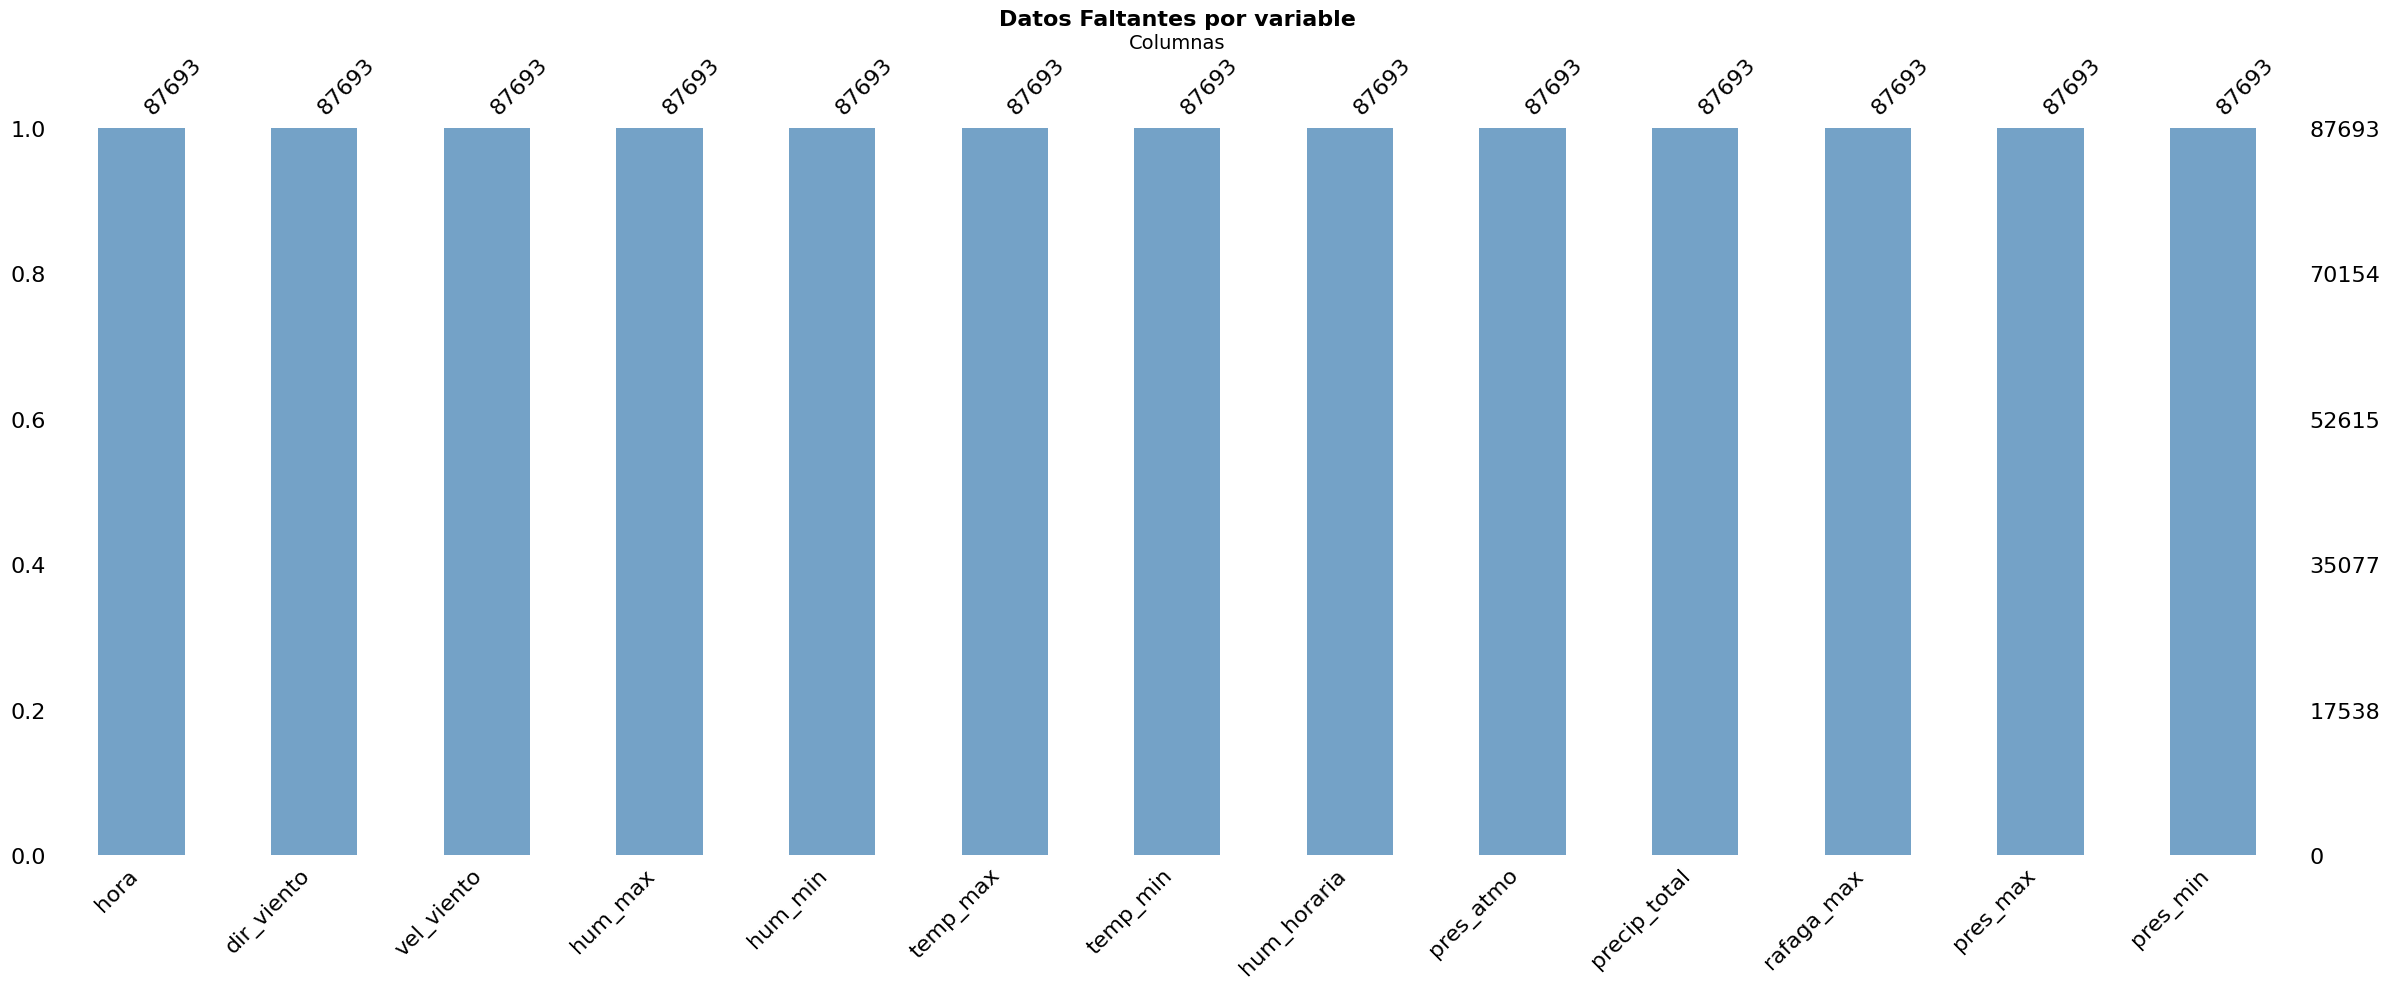

In [14]:
msno.bar(data, color = "#74A2C7", sort = 'ascending')
plt.title('Datos Faltantes por variable', fontsize = 16, fontweight = 'bold')
plt.xlabel('Columnas', fontsize = 14)
plt.ylabel('Porcentaje de Datos Faltantes', fontsize = 14)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

El gráfico muestra que no hay datos faltantes en ninguna de las variables, ya que todas las barras está llenas. Esto indica que las columnas están completas y no presentan valores nulos o faltantes, lo cual es bueno para predecir de manera más precisa nuestro modelo.

Analicemos ahora las variables de manera individual, para obtener una comprensión más detallada de su comportamiento. Observaremos aspectos clave como la distribución, rangos de valores y la posible presencia de valores atípicos. Esto nos permitirá identificar patrones y realizar ajustes en los datos en caso de ser necesario, optimizando su uso en futuros modelos predictivos.

### **Variables categóricas**

Se utiliza el método `describe( include = object)` para generar estadísticas descriptivas sobre las variables categóricas. En este caso solo se tiene una variable categórica

In [15]:
data.describe(include = 'object')

,hora
count,87693
unique,24
top,01:00
freq,3683


 En este caso, se analiza la columna `hora`, mostrando que hay 87,693 registros, con 24 valores únicos diferentes. El valor más frecuente es `01:00`, que aparece 3,683 veces y no hay datos faltantes como anteriormente ya lo habiamos observado. 


In [16]:
data['hora'].unique()

array(['12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00',
       '19:00', '20:00', '21:00', '22:00', '23:00', '00:00', '01:00',
       '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00',
       '09:00', '10:00', '11:00'], dtype=object)

Nótese que un día tiene 24 horas, lo cual concuerda con la cantidad de valores únicos diferentes (24). Dado que la hora está en formato UTC, podemos concluir que la hora más frecuente para las observaciones es a la `01:00` de la tarde.

Veamos ahora un diagrama de barras y un conteo que muestra la frecuencia de cada hora. Esto nos ayudará a identificar cómo se distribuyen las observaciones a lo largo del día y a detectar posibles patrones en momentos específicos. 


In [17]:
data['hora'].value_counts()

hora
01:00    3683
20:00    3683
02:00    3683
18:00    3672
03:00    3671
16:00    3668
17:00    3667
22:00    3667
19:00    3666
23:00    3665
15:00    3662
04:00    3659
21:00    3654
05:00    3654
06:00    3649
14:00    3648
00:00    3645
13:00    3644
12:00    3642
07:00    3638
08:00    3631
11:00    3625
10:00    3612
09:00    3605
Name: count, dtype: int64

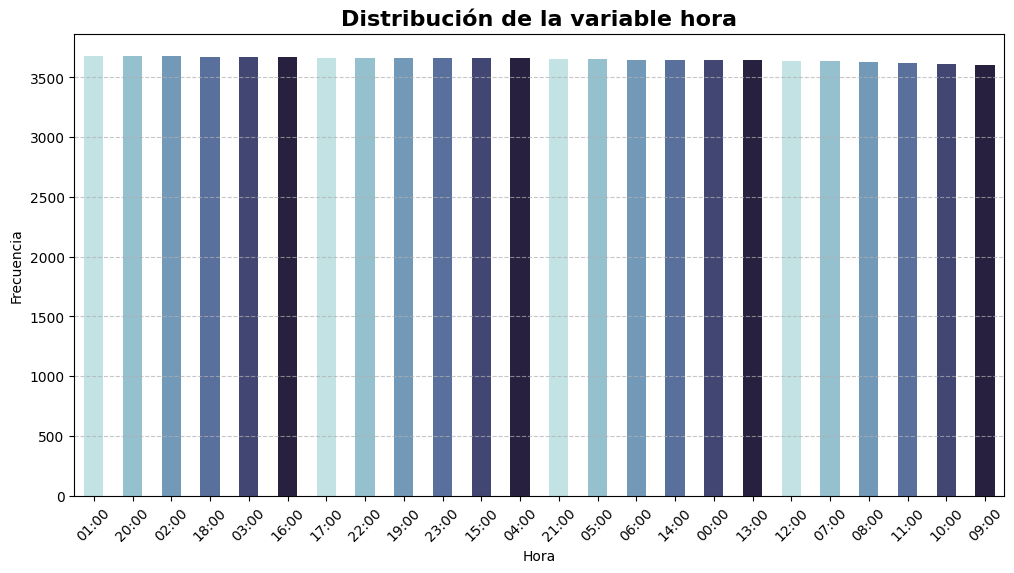

In [18]:
colors = sns.color_palette('ch:start=.2,rot=-.3') 
plt.figure(figsize = (12, 6))
data['hora'].value_counts().plot(kind = 'bar', color = colors)
plt.title('Distribución de la variable hora', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()


El conteo muestra la frecuencia de observaciones registradas para cada hora del día, todas alrededor de 3,600, lo que indica una distribución bastante uniforme de las mediciones a lo largo del día. El gráfico de barras (organizado de la mayor frecuencia a la menor) refuerza esta observación, mostrando que no hay grandes variaciones en la cantidad de registros por hora. 

### **Variables numéricas**

#### **Variable numérica: dir_viento**

La dirección del viento es una variable importante en el análisis meteorológico, ya que indica el rumbo desde el cual el viento sopla. Analicemos sus estadísticas

In [19]:
data['dir_viento'].describe()

count    87693.000000
mean         0.405810
std          0.686247
min         -1.000000
25%         -0.156434
50%          0.788011
75%          0.970296
max          1.000000
Name: dir_viento, dtype: float64

Al obtener las estadísticas de la variable **dirección del viento**, se confirma que no hay datos faltantes, con un total de **87,693** observaciones. El promedio de la dirección del viento es **0.405**, lo que puede ser una tendencia hacia direcciones positivas. La desviación estándar es **0.686**, lo que sugiere que existe una dispersión moderada alrededor de la media, indicando cierta variabilidad en la dirección del viento.

Los valores mínimo y máximo son **-1** y **1**, respectivamente, lo que indica un rango sugerido para la dirección del viento, la cual está dada en grados. Esto nos permite suponer que no habrá valores atípicos, lo cual es esperable en fenómenos meteorológicos con alta variabilidad. Los percentiles muestran que el 25% de los datos están por debajo de **-0.156**, mientras que el 50% (mediana) está en **0.788** y el 75% de las observaciones están por debajo de **0.970**.


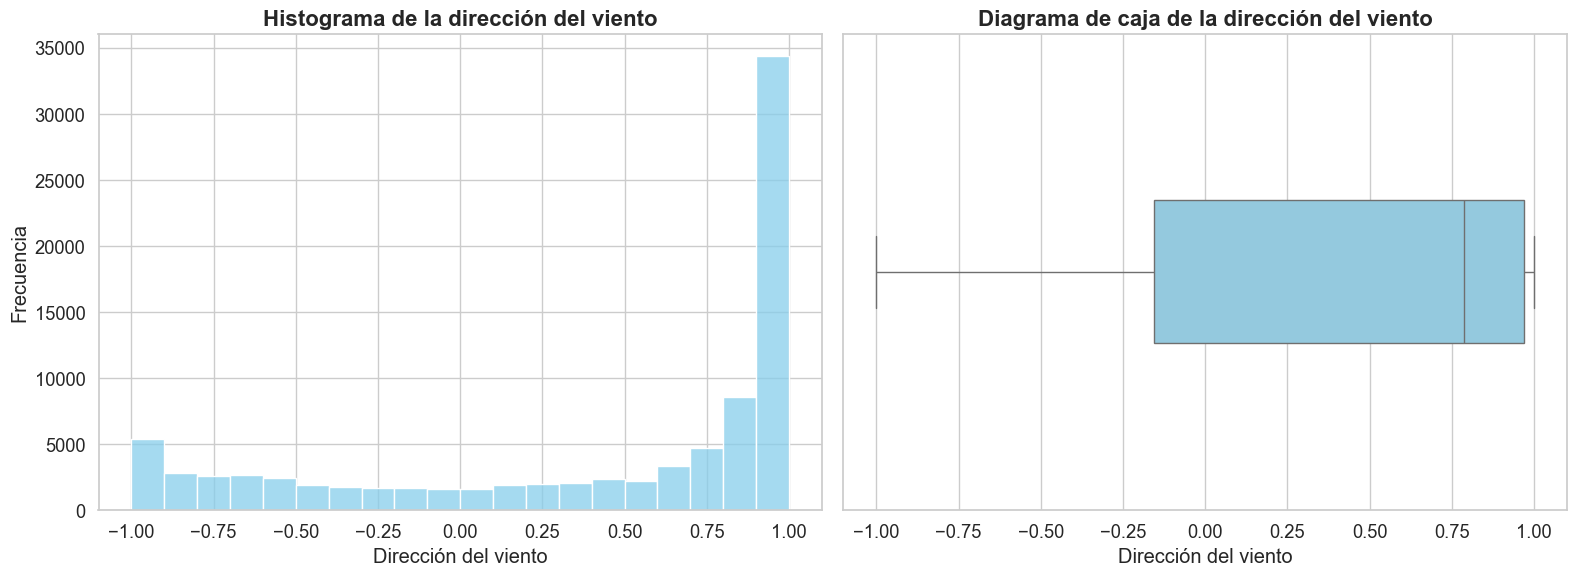

In [20]:
sns.set(style = 'whitegrid', font_scale = 1.2)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.histplot(data['dir_viento'], bins = 20, color = 'skyblue', ax = axes[0])
axes[0].set_title('Histograma de la dirección del viento', fontsize = 16, fontweight = 'bold')
axes[0].set_xlabel('Dirección del viento')
axes[0].set_ylabel('Frecuencia')

sns.boxplot(data['dir_viento'], ax = axes[1], width = 0.3, orient = 'h', color = 'skyblue')
axes[1].set_title('Diagrama de caja de la dirección del viento', fontsize = 16, fontweight = 'bold')
axes[1].set_xlabel('Dirección del viento')
axes[1].set_ylabel('')
axes[1].set(yticklabels=[]) 
plt.tight_layout()
plt.show()


El histograma muestra que la mayoría de las mediciones de la **dirección del viento** se concentran en el valor extremo de **1**, lo que sugiere que el viento tiende a soplar en direcciones positivas. Hay menos mediciones en los valores cercanos a 0, lo que indica una menor variabilidad en direcciones intermedias. El diagrama de caja confirma que la mediana está cerca de **0.78**, lo que refuerza la tendencia de los valores positivos. No se observan valores atípicos significativos, lo que sugiere que la mayoría de los datos caen dentro del rango esperado (**[-1,1]**).

#### **Variable numérica (Variable objetivo): vel_viento**

La velocidad del viento es una variable crucial en el análisis meteorológico, ya que permite determinar la fuerza y capacidad del viento para generar energía eólica. En este caso, la variable `vel_viento` es nuestra variable objetivo, ya que nos interesa predecir su valor para evaluar la cantidad de energía que puede generarse en un período de 24 horas.

In [21]:
data['vel_viento'].describe()

count    87693.000000
mean         2.466192
std          1.313968
min          0.000000
25%          1.500000
50%          2.400000
75%          3.400000
max         10.000000
Name: vel_viento, dtype: float64

Al analizar la variable **velocidad del viento**, se confirma que no hay datos faltantes, con un total de **87,693** registros. El valor promedio es **2.47 m/s**, lo que indica una tendencia hacia velocidades moderadas, y una desviación estándar de **1.31**, reflejando variabilidad en las mediciones.

Los valores mínimo y máximo son **0** y **10 m/s**, lo que sugiere la presencia de algunas mediciones sin viento y otras con velocidades más altas. El 25% de los valores están por debajo de **1.50 m/s**, la mediana es **2.40 m/s**, y el 75% de los datos están por debajo de **3.40 m/s**, concentrándose en el rango de bajas a moderadas velocidades. Teniendo en cuenta que los cuartiles oscilan en un valor menor a **5 m/s** y el máximo es **10 m/s**, es evidente la diferencia y esto sugiere posibles valores atípicos.


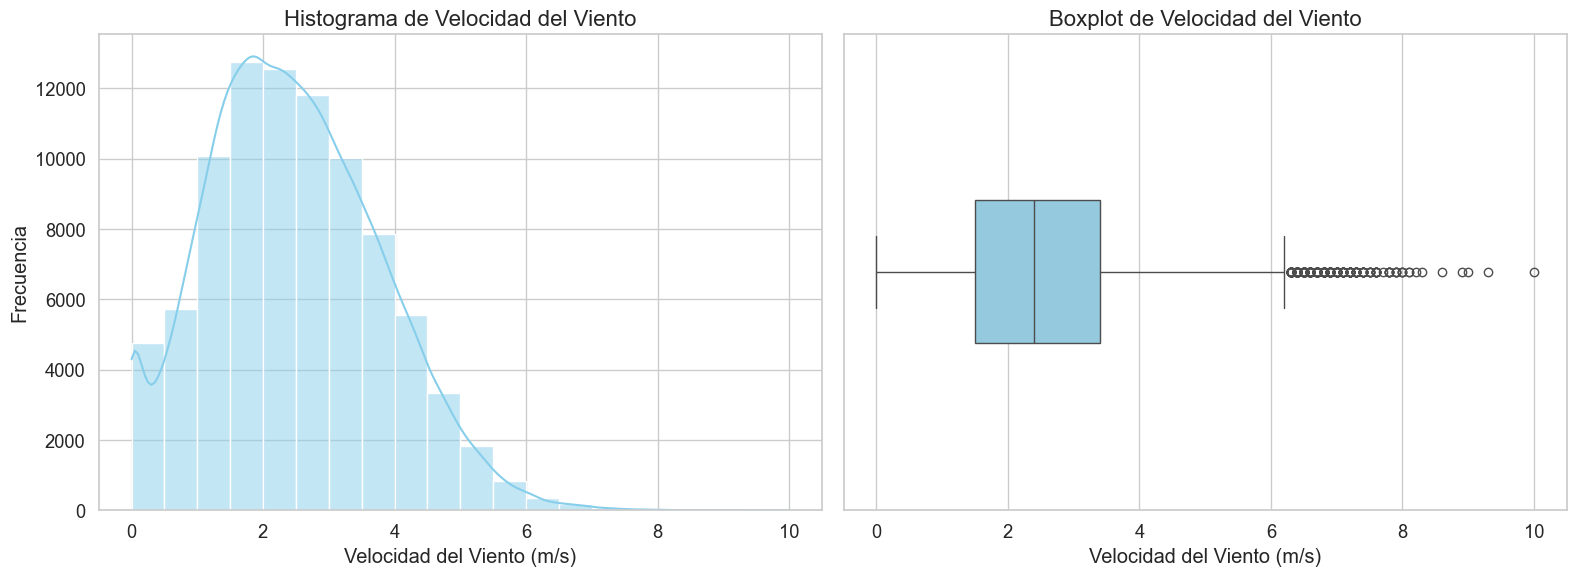

In [22]:
sns.set(style = "whitegrid", font_scale = 1.2)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

# Histograma para la variable 'vel_viento'
sns.histplot(data['vel_viento'], kde = True, bins = 20, ax = axes[0], color = 'skyblue')
axes[0].set_title('Histograma de Velocidad del Viento', fontsize = 16)
axes[0].set_xlabel('Velocidad del Viento (m/s)')
axes[0].set_ylabel('Frecuencia')

# Boxplot para la variable 'vel_viento'
sns.boxplot(data = data[['vel_viento']], ax = axes[1], width = 0.3, orient = "h", color = "skyblue")
axes[1].set_title('Boxplot de Velocidad del Viento', fontsize = 16)
axes[1].set_xlabel('Velocidad del Viento (m/s)')
axes[1].set_ylabel('')
axes[1].set(yticklabels=[]) 
plt.tight_layout()
plt.show()


El histograma de la **velocidad del viento** muestra una distribución sesgada hacia la derecha, con la mayor parte de las mediciones concentradas entre **1.5 m/s** y **4 m/s**. Esto sugiere que la velocidad del viento generalmente tiende hacia valores moderados.

El diagrama de caja confirma que la mediana está cerca de **2.4 m/s**, y se observan algunos valores atípicos por encima de **6 m/s**, lo que indica la presencia de velocidades de viento significativamente más altas en algunos momentos. 

En este caso, dado que los valores atípicos representan velocidades de viento altas (por encima de 6 m/s), es posible que estos datos sean errores pero dado que se esta hablando de un comportamiento natural del viento, es posible que se presenten altas velocidades en ciertos momentos. Los factores meteorológicos, como el viento, suelen tener una alta variabilidad, y estas velocidades más altas podrían ser eventos reales y relevantes, especialmente para la generación de energía eólica.

#### **Variable numérica: hum_max**

La variable **humedad relativa máxima** (`hum_max`) mide el porcentaje más alto de humedad relativa registrado en una hora anterior, siendo un indicador importante para comprender las condiciones atmosféricas y la capacidad del aire para contener agua.

In [23]:
data['hum_max'].describe()

count    87693.000000
mean        69.058465
std         19.640222
min         12.000000
25%         54.000000
50%         72.000000
75%         87.000000
max        100.000000
Name: hum_max, dtype: float64

Al analizar las estadísticas de la variable **humedad máxima**, se tiene un total de **87,693** observaciones sin datos faltantes. El valor promedio de la humedad máxima es **69.06%**, lo que indica que, en general, la humedad suele ser alta. La desviación estándar es **19.64%**, lo que muestra una variabilidad moderada en los datos. Los valores mínimos y máximos son **12%** y **100%**, respectivamente, lo que sugiere una gran amplitud en las condiciones atmosféricas observadas. Los percentiles muestran que el 25% de los datos están por debajo de **54%**, el 50% (mediana) está en **72%**, y el 75% está por debajo de **87%**, lo que indica que la mayoría de las observaciones tienen niveles altos de humedad y son observaciones que abarcan la mayor parte del rango lo que puede sugerir que no hay presencia de valores atípicos

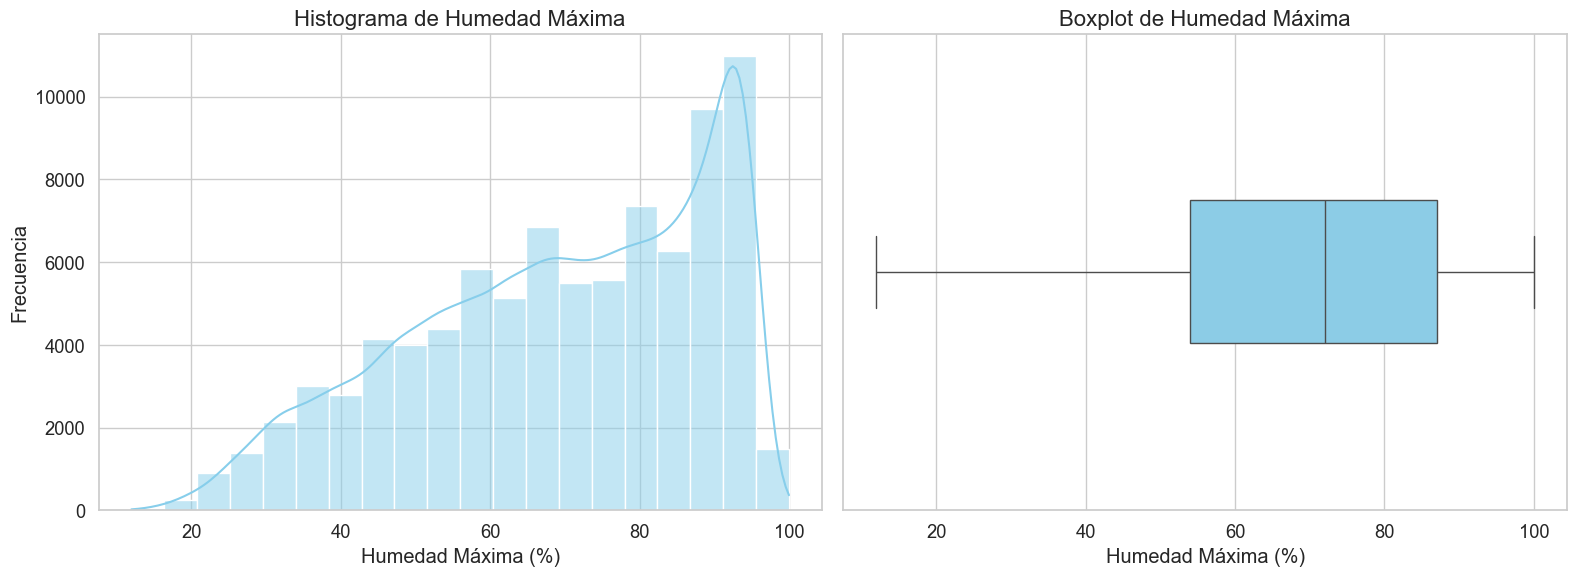

In [24]:
sns.set(style = "whitegrid", font_scale = 1.2)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.histplot(data['hum_max'], kde = True, bins = 20, ax = axes[0], color = 'skyblue')
axes[0].set_title('Histograma de Humedad Máxima', fontsize = 16)
axes[0].set_xlabel('Humedad Máxima (%)')
axes[0].set_ylabel('Frecuencia')

sns.boxplot(data = data[['hum_max']], ax = axes[1], width = 0.3, saturation = 0.9, orient = "h", color = "skyblue")
axes[1].set_title('Boxplot de Humedad Máxima', fontsize = 16)
axes[1].set_xlabel('Humedad Máxima (%)')
axes[1].set_ylabel('')
axes[1].set(yticklabels=[])
plt.tight_layout()
plt.show()

El histograma muestra una distribución sesgada hacia la derecha, con una mayor concentración de valores en los rangos altos de humedad, entre **60%** y **100%**, lo que confirma que la humedad máxima tiende a ser alta en la mayoría de las observaciones. El diagrama de caja también refuerza esta observación, mostrando que no hay valores atípicos significativos y que la distribución está bastante equilibrada, con la mediana en **72%** y la mayoría de los datos distribuidos en el rango de **54%** a **87%**.

#### **Variable numérica: hum_min**

La variable **humedad relativa mínima** (`hum_min`) mide el nivel más bajo de humedad relativa registrado en una hora , proporcionando información sobre las condiciones más secas observadas en el ambiente.

In [25]:
data['hum_min'].describe()

count    87693.000000
mean        63.176194
std         20.166336
min         10.000000
25%         48.000000
50%         64.000000
75%         80.000000
max         98.000000
Name: hum_min, dtype: float64

Al analizar las estadísticas de la variable **humedad mínima**, se tiene un total de **87,693** observaciones sin datos faltantes. El promedio de la humedad mínima es **63.18%**, lo que sugiere que incluso en los momentos más secos, la humedad se mantiene relativamente alta. La desviación estándar es **20.17%**, mostrando una variabilidad moderada en las condiciones de humedad mínima. Los valores mínimo y máximo son **10%** y **98%**, respectivamente, lo que indica un amplio rango en las condiciones de sequedad. Los percentiles revelan que el 25% de los datos están por debajo de **48%**, la mediana está en **64%**, y el 75% de las observaciones están por debajo de **80%**, indicando una tendencia general hacia valores medios y altos de humedad mínima.

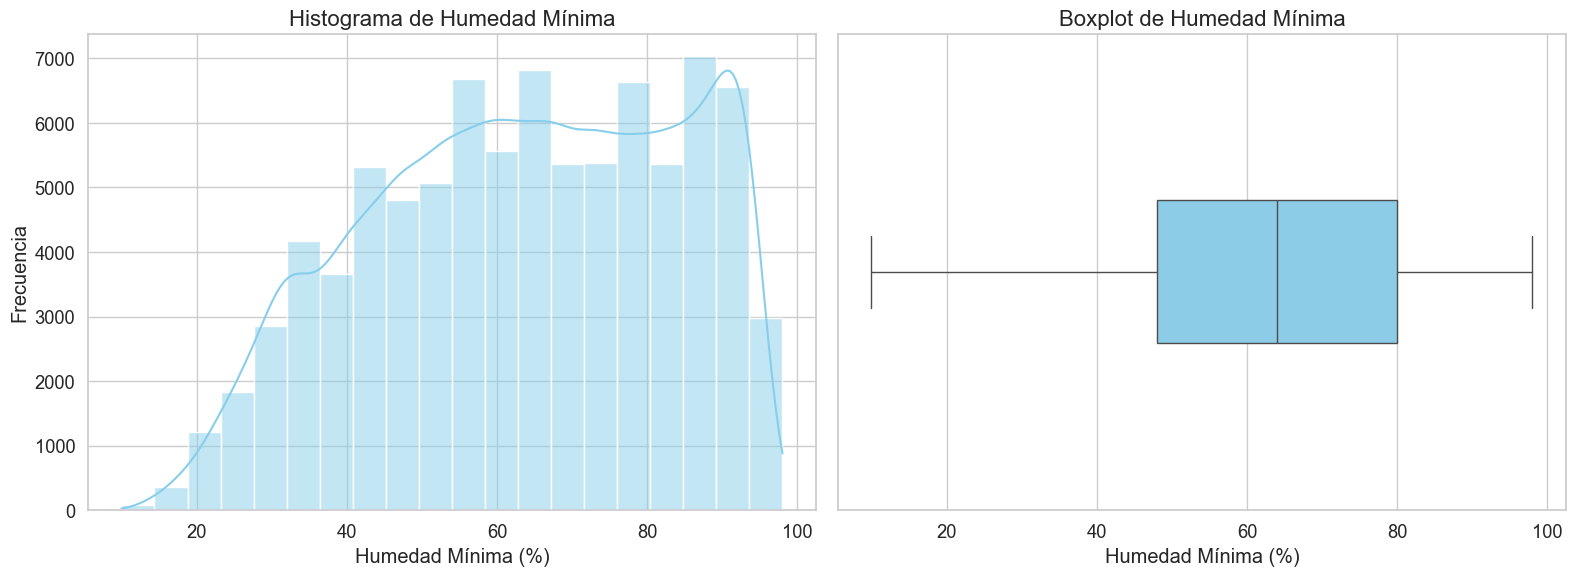

In [26]:
sns.set(style = "whitegrid", font_scale = 1.2)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.histplot(data['hum_min'], kde = True, bins = 20, ax = axes[0], color = 'skyblue')
axes[0].set_title('Histograma de Humedad Mínima', fontsize = 16)
axes[0].set_xlabel('Humedad Mínima (%)')
axes[0].set_ylabel('Frecuencia')

sns.boxplot(data = data[['hum_min']], ax = axes[1], width = 0.3, saturation = 0.9, orient = "h", color = "skyblue")
axes[1].set_title('Boxplot de Humedad Mínima', fontsize = 16)
axes[1].set_xlabel('Humedad Mínima (%)')
axes[1].set_ylabel('')
axes[1].set(yticklabels=[])
plt.tight_layout()
plt.show()

El histograma muestra una distribución sesgada hacia la derecha, con una mayor concentración de valores entre **50%** y **80%**, lo que confirma que la humedad mínima tiende a mantenerse relativamente alta. El diagrama de caja respalda esta observación, con una distribución equilibrada y sin la presencia de valores atípicos, reflejando que la mayoría de los datos se encuentran entre **48%** y **80%** de humedad mínima.

#### **Variable numérica: temp_max**

La variable **temperatura máxima** (`temp_max`) mide el valor más alto de la temperatura (en grados Celsius) registrado en una hora, proporcionando información clave sobre las condiciones de calor en el ambiente.

In [27]:
data['temp_max'].describe()

count    87693.000000
mean        21.921264
std          3.721386
min          9.200000
25%         19.200000
50%         21.400000
75%         24.700000
max         35.300000
Name: temp_max, dtype: float64

Al analizar las estadísticas de la variable **temperatura máxima**, se cuenta con **87,693** observaciones sin datos faltantes. El valor promedio es **21.92°C**, lo que sugiere temperaturas moderadas en general. La desviación estándar es **3.72°C**, lo que indica una variabilidad moderada en las temperaturas. El valor mínimo registrado es **9°C** y el máximo es **35.3°C**, lo que refleja un rango amplio de temperaturas. Los percentiles muestran que el 25% de los valores están por debajo de **19.2°C**, el 50% (mediana) está en **21.4°C**, y el 75% de las observaciones están por debajo de **24.7°C**, lo que sugiere que la mayoría de las temperaturas máximas tienden a ser moderadas.

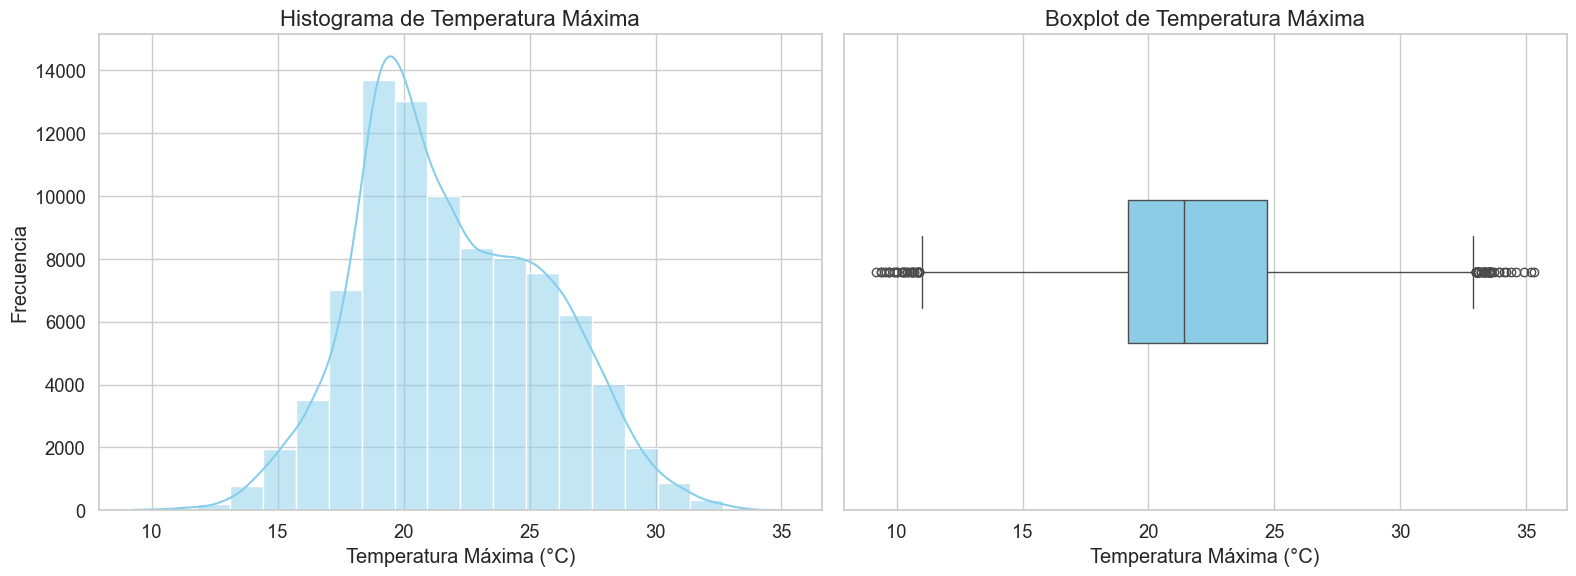

In [28]:
sns.set(style = "whitegrid", font_scale = 1.2)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

# Histograma para la variable 'temp_max'
sns.histplot(data['temp_max'], kde = True, bins = 20, ax = axes[0], color = 'skyblue')
axes[0].set_title('Histograma de Temperatura Máxima', fontsize = 16)
axes[0].set_xlabel('Temperatura Máxima (°C)')
axes[0].set_ylabel('Frecuencia')

# Boxplot para la variable 'temp_max'
sns.boxplot(data = data[['temp_max']], ax = axes[1], width = 0.3, saturation = 0.9, orient = "h", color = "skyblue")
axes[1].set_title('Boxplot de Temperatura Máxima', fontsize = 16)
axes[1].set_xlabel('Temperatura Máxima (°C)')
axes[1].set_ylabel('')
axes[1].set(yticklabels=[])
plt.tight_layout()
plt.show()

El histograma muestra una distribución ligeramente sesgada hacia la derecha, con una mayor concentración de valores entre **20°C** y **25°C**, lo que confirma que la temperatura máxima tiende a mantenerse en un rango moderado. El diagrama de caja indica la presencia de algunos valores atípicos por debajo de **15°C** y por encima de **30°C**, aunque estos son casos excepcionales, lo que sugiere que la mayor parte de los datos se concentran en un rango predecible de temperaturas. Se nota la presencia de varios valores atípicos.

No se deben imputar los datos atípicos en este caso porque los valores extremos en variables meteorológicas, como la temperatura máxima, suelen representar eventos climáticos reales y relevantes, no errores en los datos. La imputación de estos valores atípicos podría eliminar información importante sobre condiciones climáticas extremas que, aunque menos frecuentes, son esenciales para predecir comportamientos fuera de lo común y mejorar la precisión del modelo.

#### **Variable numérica: temp_min**

La variable **temperatura mínima** (`temp_min`) mide el valor más bajo de la temperatura (en grados Celsius) registrado en una hora, proporcionando información sobre las condiciones más frías del ambiente.

In [29]:
data['temp_min'].describe()

count    87693.000000
mean        20.684570
std          3.513744
min          8.400000
25%         18.400000
50%         20.200000
75%         23.100000
max         34.400000
Name: temp_min, dtype: float64

Al analizar las estadísticas de la variable **temperatura mínima**, se tienen **87,693** observaciones sin datos faltantes. El valor promedio es **20.68°C**, lo que sugiere temperaturas generalmente moderadas. La desviación estándar es **3.51°C**, lo que indica una variabilidad moderada en las temperaturas mínimas registradas. El valor mínimo es **8.4°C** y el máximo es **34.4°C**, lo que refleja una amplia gama de temperaturas. Los percentiles muestran que el 25% de los valores están por debajo de **18.4°C**, el 50% (mediana) está en **20.2°C**, y el 75% de las observaciones están por debajo de **23.1°C**, lo que sugiere que la mayor parte de las temperaturas mínimas se concentra en rangos moderados.

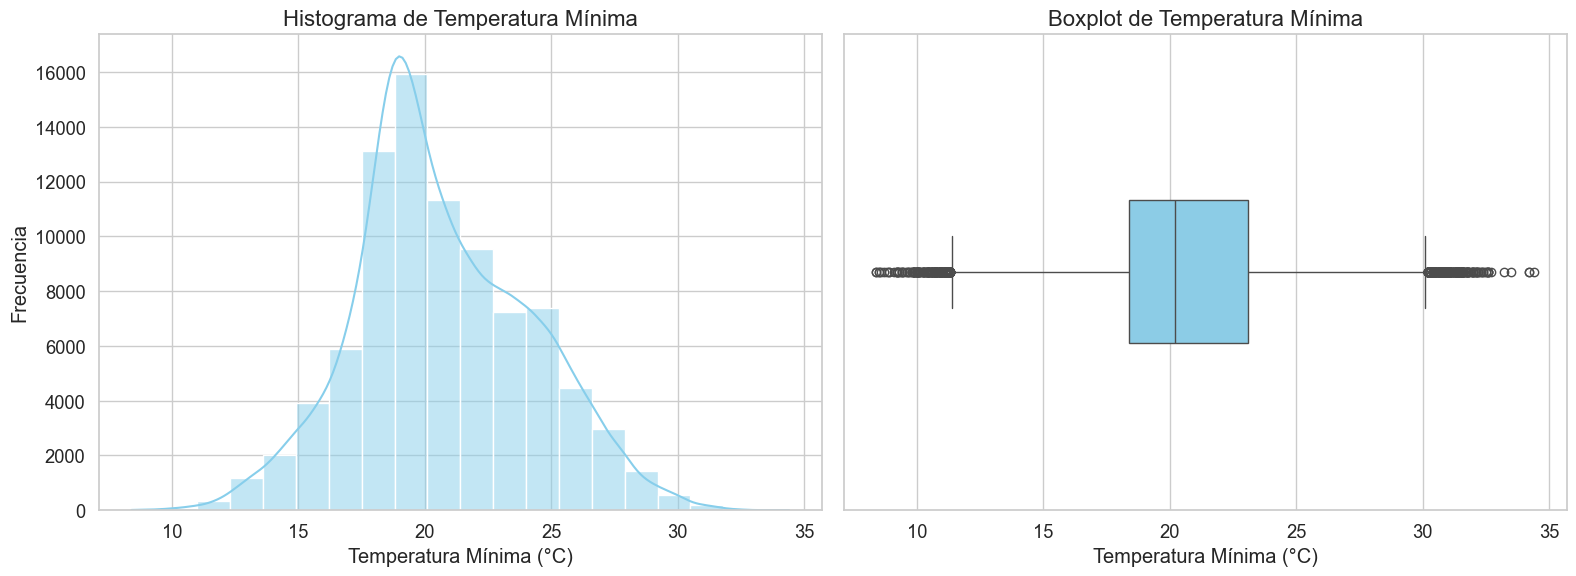

In [30]:
sns.set(style = "whitegrid", font_scale = 1.2)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

# Histograma para la variable 'temp_min'
sns.histplot(data['temp_min'], kde = True, bins = 20, ax = axes[0], color = 'skyblue')
axes[0].set_title('Histograma de Temperatura Mínima', fontsize = 16)
axes[0].set_xlabel('Temperatura Mínima (°C)')
axes[0].set_ylabel('Frecuencia')

# Boxplot para la variable 'temp_min'
sns.boxplot(data = data[['temp_min']], ax = axes[1], width = 0.3, saturation = 0.9, orient = "h", color = "skyblue")
axes[1].set_title('Boxplot de Temperatura Mínima', fontsize = 16)
axes[1].set_xlabel('Temperatura Mínima (°C)')
axes[1].set_ylabel('')
axes[1].set(yticklabels=[])
plt.tight_layout()
plt.show()

El histograma muestra una distribución sesgada hacia la derecha, con una mayor concentración de valores entre **18°C** y **23°C**, lo que confirma que la temperatura mínima tiende a mantenerse en rangos moderados. El diagrama de caja indica la presencia de algunos valores atípicos por debajo de **15°C** y por encima de **25°C**, lo que sugiere la existencia de eventos climáticos inusuales, aunque la mayoría de los datos se concentran en rangos más predecibles. En este caso, NO es recomendable eliminar los valores atípicos en este caso porque las temperaturas mínimas extremas pueden representar eventos climáticos reales y relevantes, no errores en los datos

#### **Variable numérica: hum_horaria**

La variable **humedad relativa horaria** (`hum_horaria`) mide el nivel de humedad relativa registrado por hora, expresado como un porcentaje, y es crucial para entender la cantidad de humedad presente en el aire a lo largo del tiempo.

In [31]:
data['hum_horaria'].describe()

count    87693.000000
mean        66.146682
std         19.992327
min         10.000000
25%         51.000000
50%         68.000000
75%         84.000000
max         99.000000
Name: hum_horaria, dtype: float64

Al revisar las estadísticas de la variable humedad horaria, se cuenta con un total de 87,693 registros completos, sin valores faltantes. El valor promedio de la humedad horaria es 66.15%, lo que sugiere que, en promedio, los niveles de humedad tienden a ser elevados. La desviación estándar de 19.99% refleja una variabilidad moderada en los niveles de humedad registrados por hora. Los valores mínimo y máximo son 10% y 99%, respectivamente, lo que indica un rango considerable de condiciones de humedad. Los percentiles revelan que el 25% de las observaciones tienen valores inferiores a 51%, mientras que el 50% (mediana) se sitúa en 68%, y el 75% de las mediciones están por debajo de 84%, lo que sugiere que la mayoría de los valores se encuentran en rangos de humedad moderada a alta.

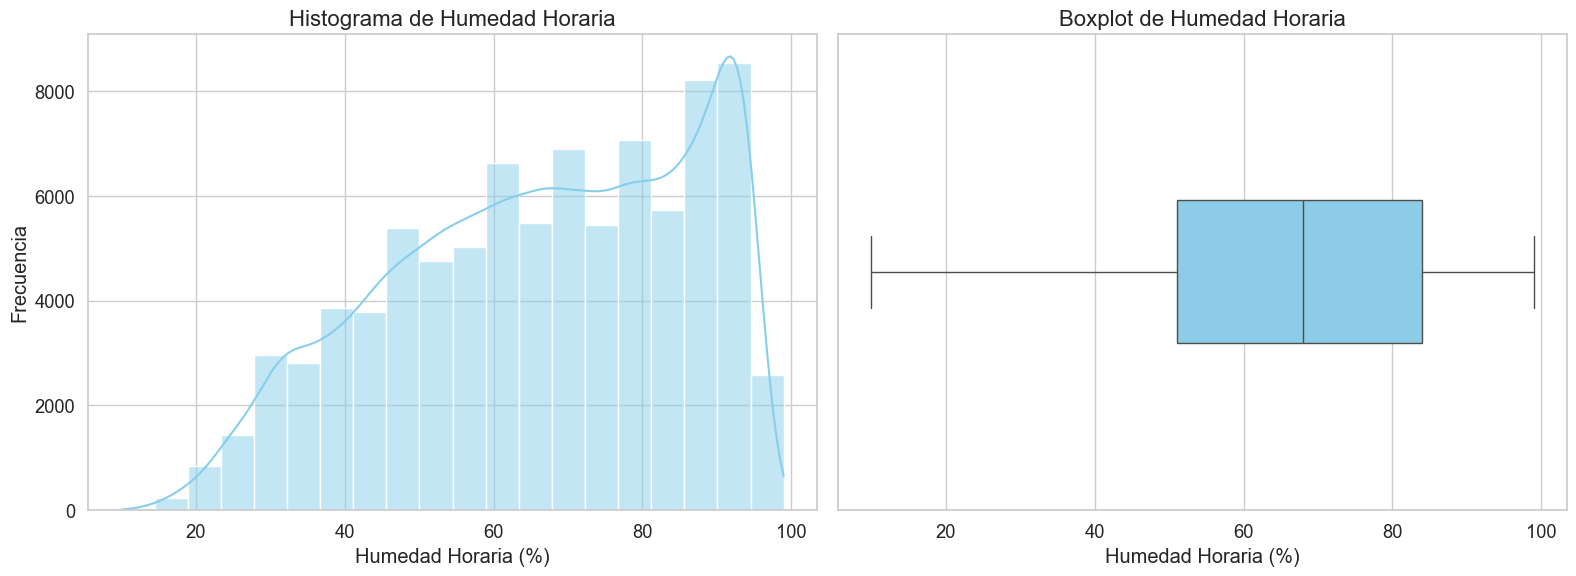

In [32]:
sns.set(style = "whitegrid", font_scale = 1.2)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.histplot(data['hum_horaria'], kde = True, bins = 20, ax = axes[0], color = 'skyblue')
axes[0].set_title('Histograma de Humedad Horaria', fontsize = 16)
axes[0].set_xlabel('Humedad Horaria (%)')
axes[0].set_ylabel('Frecuencia')

sns.boxplot(data = data[['hum_horaria']], ax = axes[1], width = 0.3, saturation = 0.9, orient = "h", color = "skyblue")
axes[1].set_title('Boxplot de Humedad Horaria', fontsize = 16)
axes[1].set_xlabel('Humedad Horaria (%)')
axes[1].set_ylabel('')
axes[1].set(yticklabels=[])
plt.tight_layout()
plt.show()

El histograma muestra una distribución con una mayor concentración de valores entre **50%** y **100%**, lo que confirma que la humedad horaria tiende a mantenerse en niveles altos. El diagrama de caja refuerza esta observación, mostrando que la distribución es bastante equilibrada sin la presencia de valores atípicos, lo que indica una consistencia en los datos a lo largo del tiempo. No se nota presencia de datos atípicos

#### **Variable numérica: pres_atmo**

La variable **presión atmosférica** (`pres_atmo`) mide la presión del aire en milibares (mB), un indicador clave para entender las condiciones meteorológicas, como los cambios de clima y la altitud.

In [33]:
data['pres_atmo'].describe()

count    87693.000000
mean       887.251925
std          4.012404
min        863.400000
25%        885.300000
50%        887.200000
75%        889.100000
max       1023.500000
Name: pres_atmo, dtype: float64

Al revisar las estadísticas de la variable **presión atmosférica**, se dispone de un total de **87,693** registros sin ningún dato faltante. El valor promedio es de **887.25 mB**, lo que sugiere que la presión atmosférica se mantiene relativamente constante. Con una desviación estándar de **4.01 mB**, se observa una variabilidad baja en los datos. Los valores mínimo y máximo son **863.4 mB** y **1023.5 mB**, lo que refleja una amplitud considerable en las mediciones. Los percentiles indican que el 25% de las mediciones están por debajo de **885.3 mB**, la mediana se sitúa en **887.2 mB**, y el 75% de los valores están por debajo de **889.1 mB**, lo que sugiere que la mayoría de las observaciones se encuentran dentro de un rango estrecho de presión atmosférica.

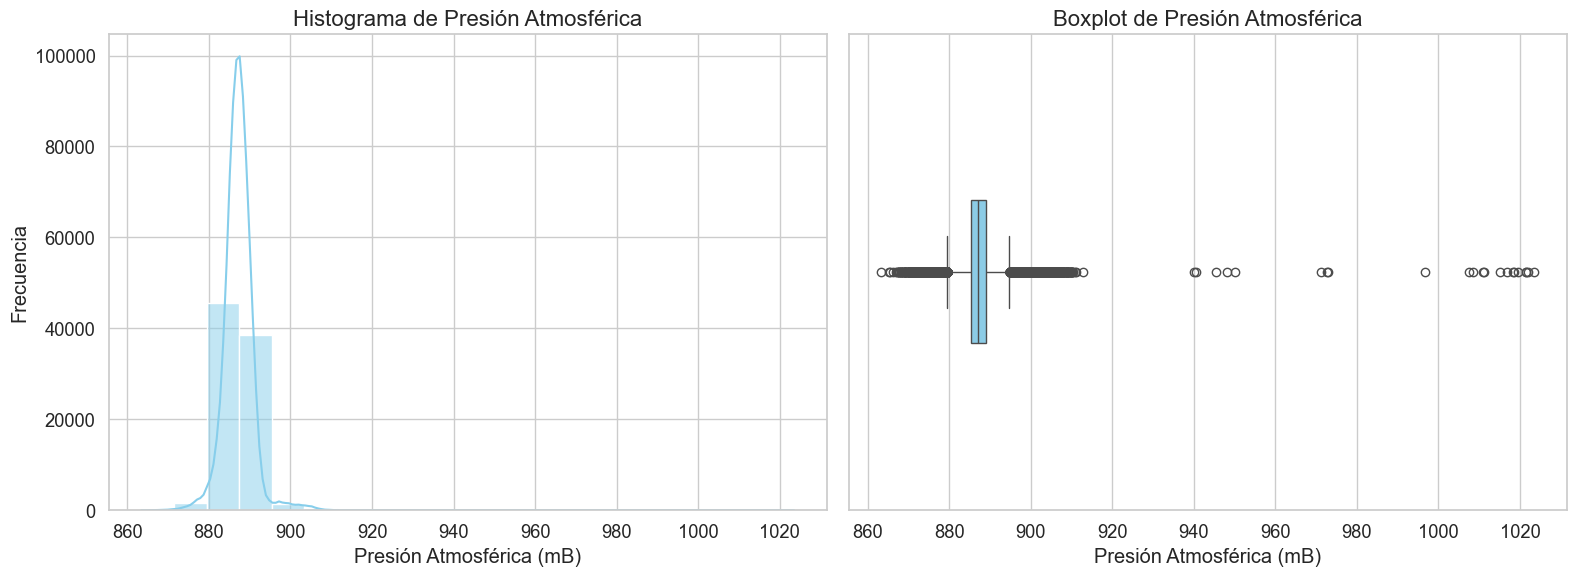

In [34]:
sns.set(style = "whitegrid", font_scale = 1.2)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.histplot(data['pres_atmo'], kde = True, bins = 20, ax = axes[0], color = 'skyblue')
axes[0].set_title('Histograma de Presión Atmosférica', fontsize = 16)
axes[0].set_xlabel('Presión Atmosférica (mB)')
axes[0].set_ylabel('Frecuencia')

sns.boxplot(data = data[['pres_atmo']], ax = axes[1], width = 0.3, saturation = 0.9, orient = "h", color = "skyblue")
axes[1].set_title('Boxplot de Presión Atmosférica', fontsize = 16)
axes[1].set_xlabel('Presión Atmosférica (mB)')
axes[1].set_ylabel('')
axes[1].set(yticklabels=[])
plt.tight_layout()
plt.show()

El histograma muestra que la mayor parte de las observaciones están fuertemente concentradas entre **880 mB** y **890 mB**, lo que refuerza la idea de una variabilidad baja. Sin embargo, el diagrama de caja revela la presencia de valores atípicos significativos tanto por debajo de **870 mB** como por encima de **900 mB**, lo que puede estar asociado con fenómenos meteorológicos inusuales o variaciones geográficas en las mediciones, por lo tanto, no se imputarán los atípicos.

#### **Variable numérica: precip_total**

La variable **precipitación total** (`precip_total`) mide la cantidad de precipitación acumulada por hora en milímetros (mm).

In [35]:
data['precip_total'].describe()

count    87693.000000
mean         0.160907
std          1.307515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.800000
Name: precip_total, dtype: float64

Al revisar las estadísticas de la variable **precipitación total**, se tiene un total de **87,693** observaciones sin datos faltantes. El promedio es **0.16 mm**, lo que sugiere que en la mayoría de las horas no se registra precipitación significativa. La desviación estándar es **1.31 mm**, lo que indica que, aunque la mayoría de los valores son bajos, hay algunos eventos con precipitaciones mayores. El valor mínimo es **0 mm** y el máximo es **70.8 mm**, lo que refleja la existencia de eventos de lluvia extrema. Los percentiles muestran que el 25%, 50% (mediana) y 75% de los datos tienen un valor de **0 mm**, lo que confirma que la precipitación es un fenómeno poco frecuente, con algunos eventos extremos.

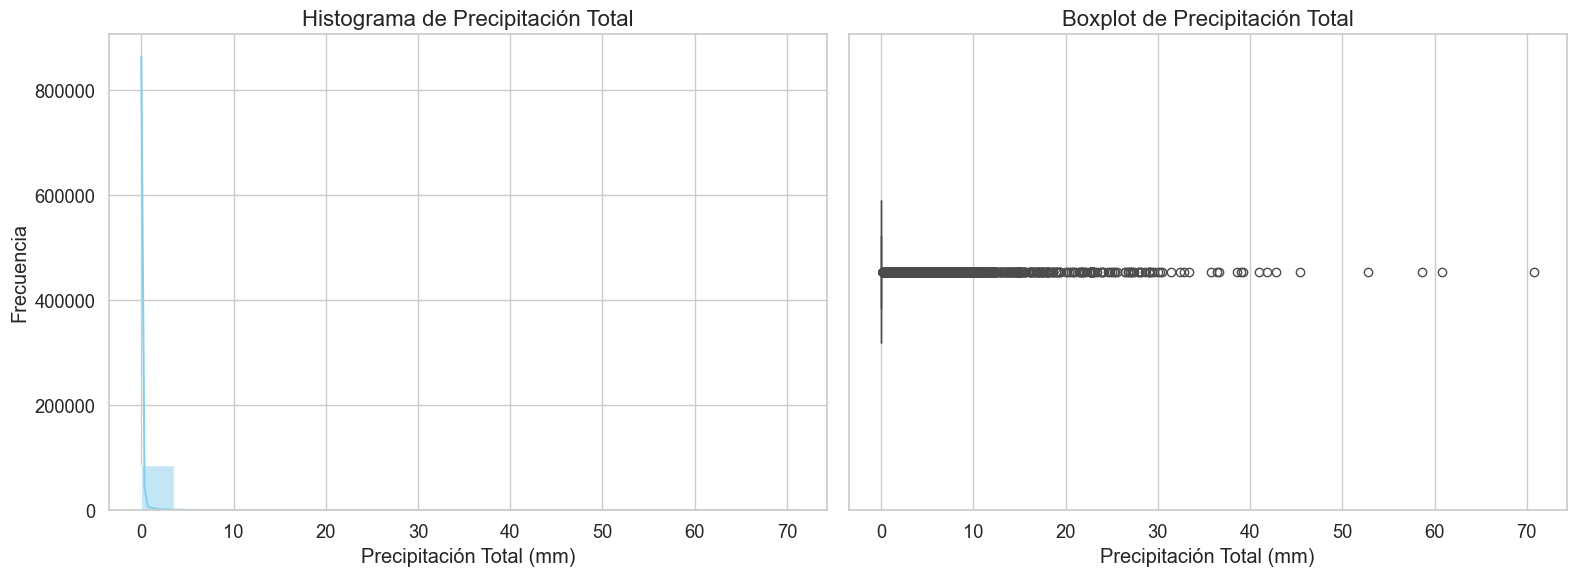

In [36]:
sns.set(style = "whitegrid", font_scale = 1.2)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.histplot(data['precip_total'], kde = True, bins = 20, ax = axes[0], color = 'skyblue')
axes[0].set_title('Histograma de Precipitación Total', fontsize = 16)
axes[0].set_xlabel('Precipitación Total (mm)')
axes[0].set_ylabel('Frecuencia')

sns.boxplot(data = data[['precip_total']], ax = axes[1], width = 0.3, saturation = 0.9, orient = "h", color = "skyblue")
axes[1].set_title('Boxplot de Precipitación Total', fontsize = 16)
axes[1].set_xlabel('Precipitación Total (mm)')
axes[1].set_ylabel('')
axes[1].set(yticklabels=[])
plt.tight_layout()
plt.show()

El histograma muestra que la mayoría de las observaciones se concentran en **0 mm**, con muy pocos valores que superen los **10 mm**. El diagrama de caja revela una gran cantidad de valores atípicos que superan los **0 mm**, lo que índica que los eventos de precipitación son relativamente raros, pero cuando ocurren, pueden ser bastante significativos, lo cual es común en fenómenos meteorológicos como las tormentas.

En este análisis, no se recomienda la imputación de los valores atípicos presentes en la variable precipitación total, ya que estos representan eventos meteorológicos reales como lluvias fuertes o tormentas, que son de gran relevancia para la comprensión y predicción de patrones climáticos. Los valores extremos en precipitación son fenómenos naturales importantes y eliminarlos o alterarlos podría llevar a la pérdida de información valiosa.

#### **Variable numérica: rafaga_max**

La variable **ráfaga máxima** (`rafaga_max`) mide la velocidad máxima del viento en metros por segundo (m/s) registrada en una hora. 

In [47]:
data['rafaga_max'].describe()

count    87693.000000
mean         5.161076
std          2.311157
min          0.000000
25%          3.400000
50%          5.000000
75%          6.800000
max         24.300000
Name: rafaga_max, dtype: float64

La variable **ráfaga máxima** tiene **87,693** observaciones sin valores faltantes. El promedio es de **5.16 m/s** y la desviación estándar de **2.31 m/s**, lo que indica una variabilidad considerable en las ráfagas de viento. Los valores mínimo y máximo son **0 m/s** y **24.3 m/s**, respectivamente. Los percentiles indican que el 50% de las ráfagas están por debajo de **5 m/s**, mientras que el 75% de las observaciones no superan los **6.8 m/s**.

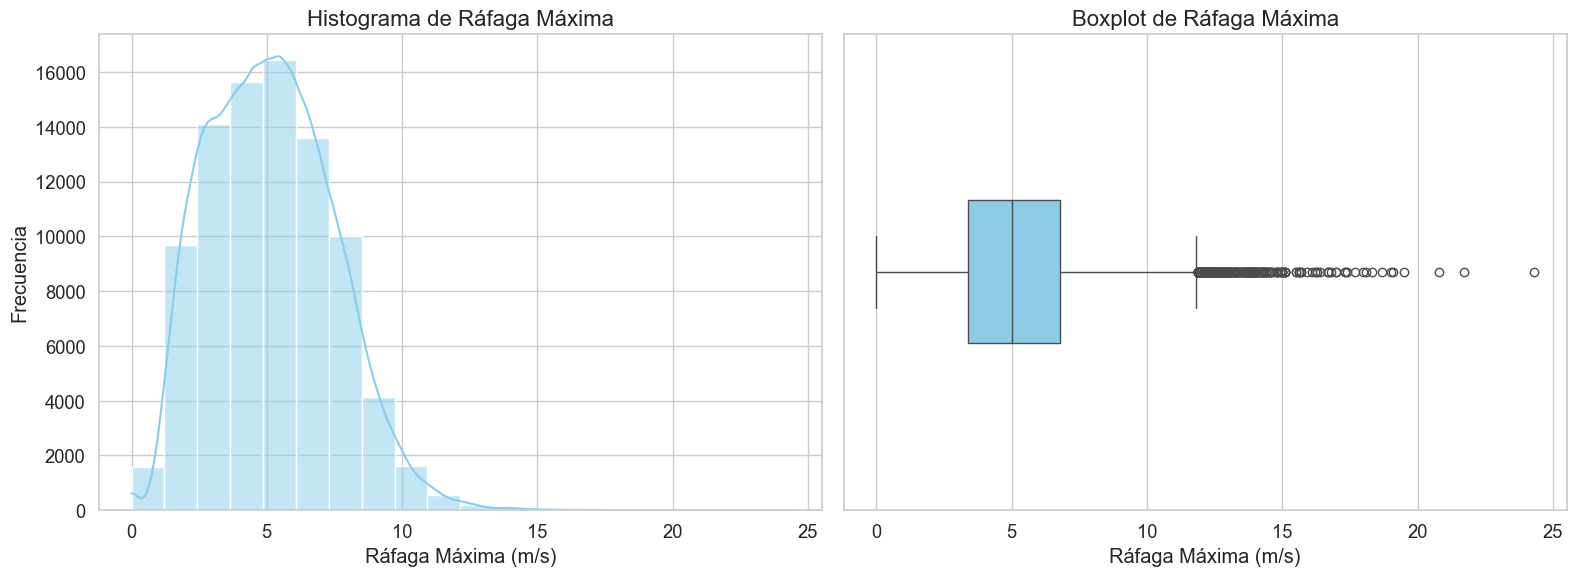

In [38]:
sns.set(style = "whitegrid", font_scale = 1.2)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.histplot(data['rafaga_max'], kde = True, bins = 20, ax = axes[0], color = 'skyblue')
axes[0].set_title('Histograma de Ráfaga Máxima', fontsize = 16)
axes[0].set_xlabel('Ráfaga Máxima (m/s)')
axes[0].set_ylabel('Frecuencia')

sns.boxplot(data = data[['rafaga_max']], ax = axes[1], width = 0.3, saturation = 0.9, orient = "h", color = "skyblue")
axes[1].set_title('Boxplot de Ráfaga Máxima', fontsize = 16)
axes[1].set_xlabel('Ráfaga Máxima (m/s)')
axes[1].set_ylabel('')
axes[1].set(yticklabels=[])
plt.tight_layout()
plt.show()

El histograma muestra que la mayoría de las ráfagas se encuentran entre **3 m/s** y **7 m/s**, lo que sugiere que la mayoría de los vientos no son muy fuertes. El diagrama de caja destaca la presencia de numerosos valores atípicos por encima de **10 m/s**, lo que indica ráfagas de viento excepcionales que pueden estar asociadas a eventos meteorológicos inusuales. Por lo tanto, dado que es posible que si sucedan estos casos, no se imputarán los datos.

#### **Variable numérica: pres_max**

La variable **presión atmosférica máxima**  mide la mayor presión registrada por hora, en milibares (mB). Esta variable es fundamental para entender las variaciones climáticas relacionadas con la presión atmosférica.

In [39]:
data['pres_max'].describe()

count    87693.000000
mean       887.580724
std          3.646750
min        865.300000
25%        885.600000
50%        887.500000
75%        889.300000
max        913.100000
Name: pres_max, dtype: float64

La variable **presión atmosférica máxima** tiene **87,693** observaciones, sin valores faltantes. El promedio es de **887.58 mB**, con una desviación estándar de **3.65 mB**, lo que refleja una baja variabilidad. Los valores mínimo y máximo son **865.3 mB** y **913.1 mB**. Los percentiles indican que el 50% de los datos están por debajo de **887.5 mB**, mientras que el 75% de las observaciones no superan los **889.3 mB**

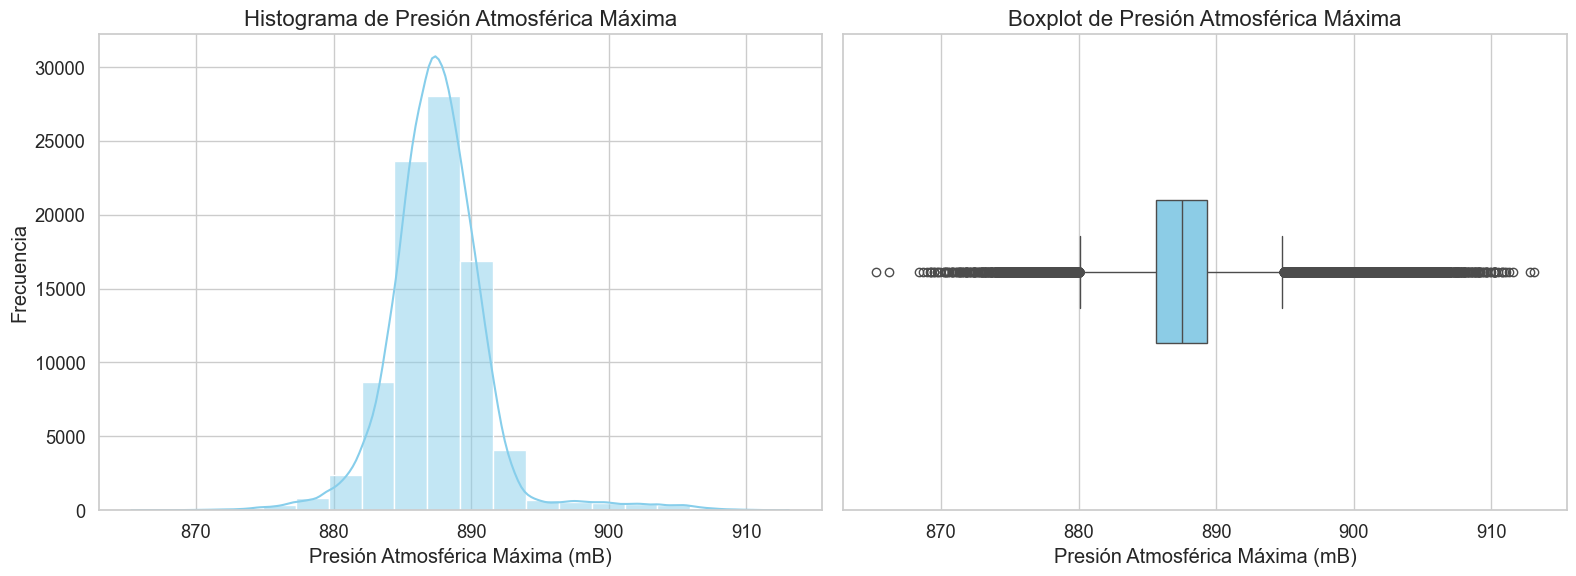

In [40]:
sns.set(style = "whitegrid", font_scale = 1.2)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.histplot(data['pres_max'], kde = True, bins = 20, ax = axes[0], color = 'skyblue')
axes[0].set_title('Histograma de Presión Atmosférica Máxima', fontsize = 16)
axes[0].set_xlabel('Presión Atmosférica Máxima (mB)')
axes[0].set_ylabel('Frecuencia')

sns.boxplot(data = data[['pres_max']], ax = axes[1], width = 0.3, saturation = 0.9, orient = "h", color = "skyblue")
axes[1].set_title('Boxplot de Presión Atmosférica Máxima', fontsize = 16)
axes[1].set_xlabel('Presión Atmosférica Máxima (mB)')
axes[1].set_ylabel('')
axes[1].set(yticklabels=[])
plt.tight_layout()
plt.show()

El histograma muestra que la mayoría de las mediciones de presión atmosférica máxima se concentran entre **885 mB** y **890 mB**, lo que indica poca variabilidad en los datos. El diagrama de caja destaca algunos valores atípicos por debajo de **870 mB** y por encima de **900 mB**, lo que sugiere la presencia de eventos atmosféricos inusuales, aunque la mayoría de los valores están agrupados dentro de un rango estrecho.

#### **Variable numérica: pres_min**

La variable **presión atmosférica mínima**  mide el valor más bajo de presión atmosférica registrado por hora, en milibares (mB). 

In [41]:
data['pres_min'].describe()

count    87693.000000
mean       886.891093
std          3.564539
min        862.800000
25%        885.000000
50%        886.900000
75%        888.800000
max        910.900000
Name: pres_min, dtype: float64

La variable **presión atmosférica mínima** cuenta con **87,693** registros sin ningún dato faltante. El valor medio es de **886.89 mB**, con una desviación estándar de **3.56 mB**, lo que indica una variación relativamente baja. Los valores oscilan entre un mínimo de **862.8 mB** y un máximo de **910.9 mB**. Los percentiles muestran que el 50% de las mediciones están por debajo de **886.9 mB**, y el 75% de los datos no exceden los **888.8 mB**.


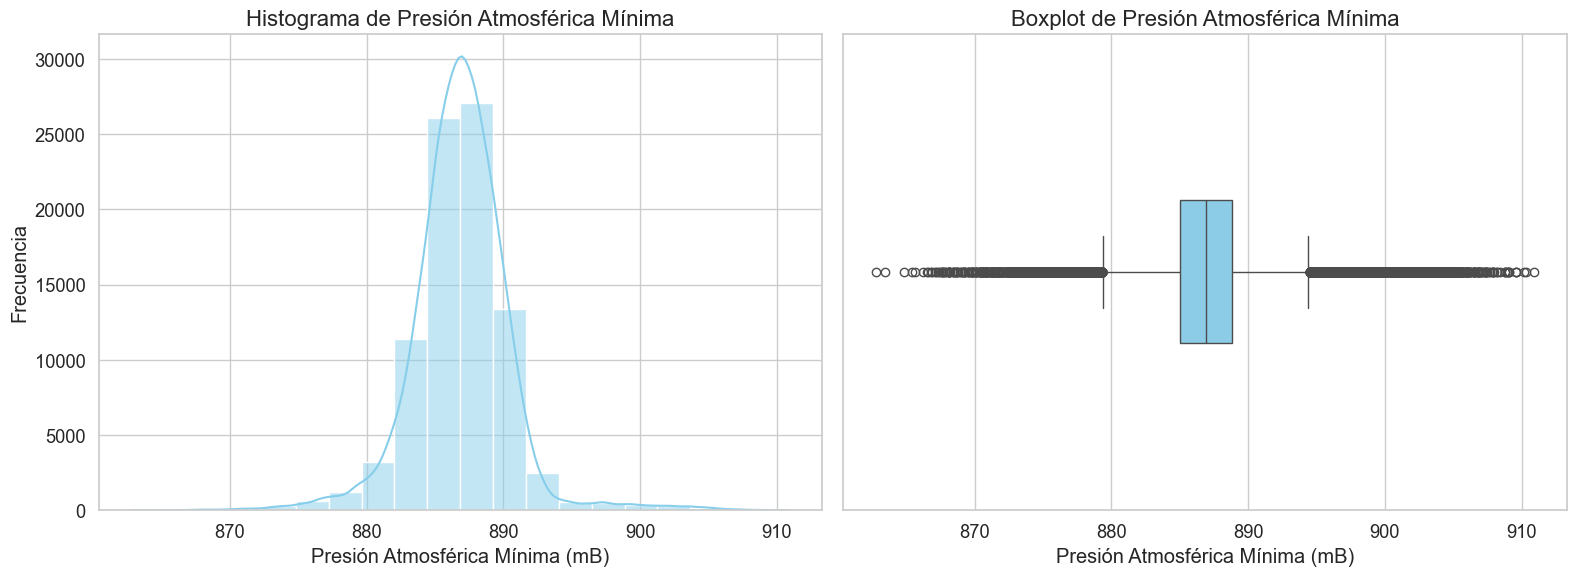

In [42]:
sns.set(style = "whitegrid", font_scale = 1.2)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.histplot(data['pres_min'], kde = True, bins = 20, ax = axes[0], color = 'skyblue')
axes[0].set_title('Histograma de Presión Atmosférica Mínima', fontsize = 16)
axes[0].set_xlabel('Presión Atmosférica Mínima (mB)')
axes[0].set_ylabel('Frecuencia')

sns.boxplot(data = data[['pres_min']], ax = axes[1], width = 0.3, saturation = 0.9, orient = "h", color = "skyblue")
axes[1].set_title('Boxplot de Presión Atmosférica Mínima', fontsize = 16)
axes[1].set_xlabel('Presión Atmosférica Mínima (mB)')
axes[1].set_ylabel('')
axes[1].set(yticklabels=[])
plt.tight_layout()
plt.show()

El histograma revela que la mayoría de los valores se agrupan entre **880 mB** y **890 mB**, lo que sugiere una estabilidad en los registros de presión atmosférica. Por otro lado, el diagrama de caja evidencia algunos valores atípicos por debajo de **870 mB** y por encima de **900 mB**, lo que podría estar vinculado a fenómenos atmosféricos inusuales.


### **Multicolinealidad**

Veamos ahora como se correlacionan las variables.

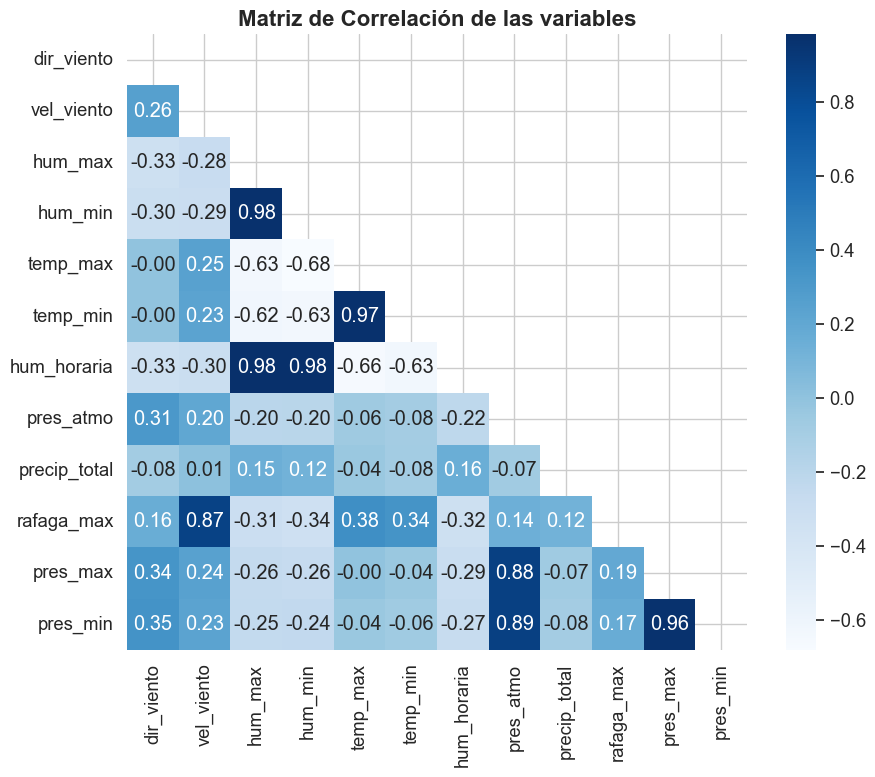

In [43]:
# Excluir la columna 'hora' (fecha) antes de calcular la matriz de correlación
dataf = data.drop(columns = ['hora'])

# Calcular la matriz de correlación sin la columna 'hora'
corr_matrix= dataf.corr()

# Visualizar la matriz de correlación
plt.figure(figsize = (10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
sns.heatmap(corr_matrix, annot = True, mask = mask, cmap = 'Blues', fmt = '.2f')
plt.title('Matriz de Correlación de las variables', fontsize = 16, fontweight = 'bold')
plt.show()


Se observa una fuerte correlación entre variables como la humedad relativa máxima y mínima `(0.98)`, lo que indica que estas dos variables siguen un comportamiento casi idéntico. De manera similar, las presiones atmosféricas máxima y mínima están altamente correlacionadas `(0.96)`, lo cual es esperado, ya que ambas miden el comportamiento de la presión en diferentes momentos. Por otra parte la relación fuerte entre la velocidad del viento y la ráfaga máxima es alta `(0.87)`, lo que sugiere que las ráfagas de viento más intensas suelen coincidir con periodos de mayor velocidad del viento

En base a la matriz de correlación, se ha identificado que las variables humedad horaria (`hum_horaria`) y presión atmosférica (`pres_atmo`) tienen una correlación muy alta con otras variables. Por ejemplo, humedad horaria presenta una correlación superior a **0.98** con humedad máxima y humedad mínima, lo que sugiere una fuerte redundancia entre estas variables. Asimismo, presión atmosférica tiene una correlación de **0.89** con presión atmosférica mínima y una correlación de **0.88** con presión atmosférica máxima. Debido a esta alta multicolinealidad, estas variables podrían afectar negativamente el desempeño del modelo, introduciendo sesgos o sobreajuste. Por lo tanto, se eliminarán del análisis para reducir la colinealidad y mejorar la precisión del modelo.

In [55]:
# Eliminar las variables 'hum_horaria' y 'pres_atmo' de la base de datos
data_modelo = data.drop(columns = ['hora', 'hum_horaria', 'pres_atmo'])

Ahora, dado que el objetivo del modelo es predecir la cantidad de energía eólica que se puede generar a partir de la velocidad del viento, aplicar el VIF para reducir la multicolinealidad podría llevar a la eliminación de variables meteorológicas importantes para el análisis. Por ejemplo, la **velocidad del viento** está altamente correlacionada con la **ráfaga máxima**, y eliminar cualquiera de estas variables podría resultar en la pérdida de información clave para modelar correctamente el comportamiento del viento. Esto reduciría la precisión y la capacidad del modelo para capturar todos los factores relevantes que influyen en la predicción de la energía eólica.

### **Análisis bivariado**

En esta sección, se llevarán a cabo diversos análisis bivariados para explorar la relación entre la variable objetivo (vel_viento) y las variables explicativas. Estos análisis permitirán identificar patrones, tendencias y correlaciones significativas que pueden influir en la velocidad del viento. A través de gráficos como `scatterplot()` y `regplot()`.

In [57]:
ejex = data_modelo.columns.drop('vel_viento') 
ejey = data_modelo['vel_viento']

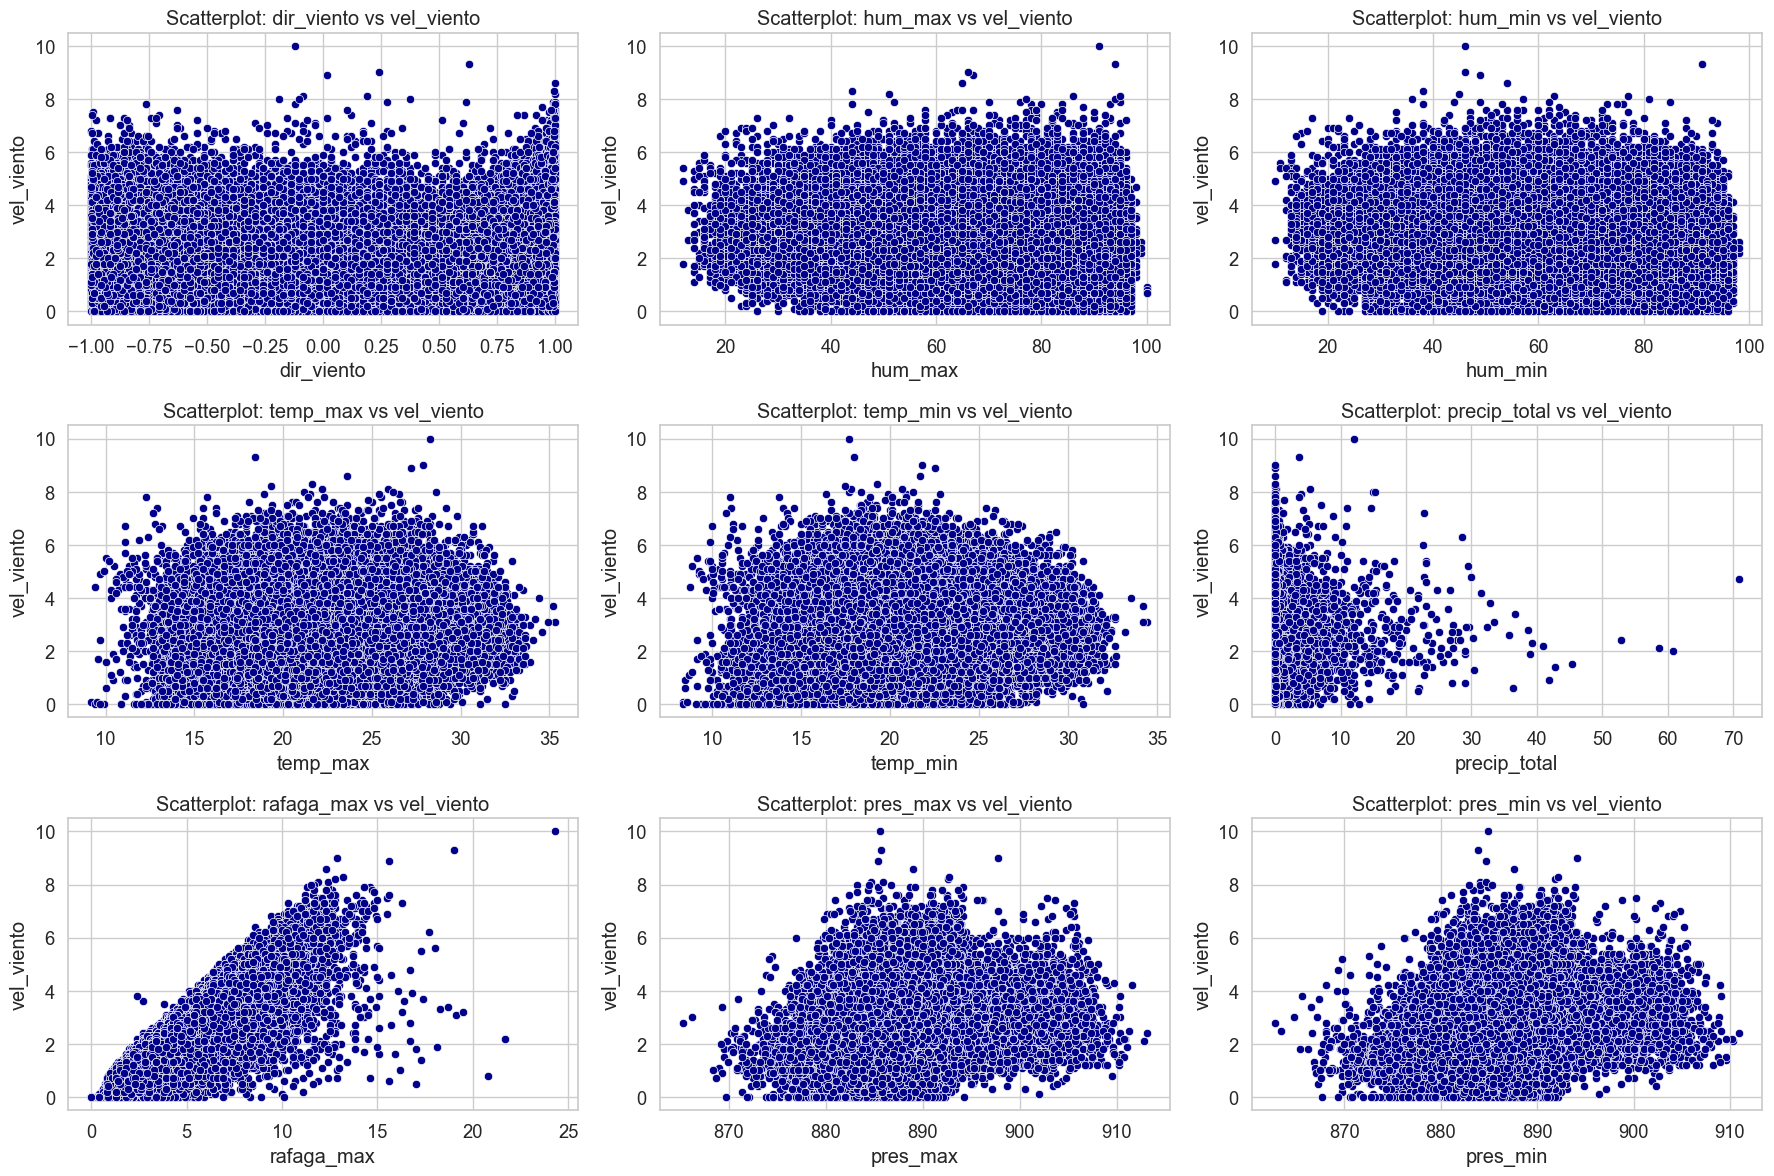

In [58]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
# Aplanar la matriz de ejes para facilitar el acceso
axs = axs.flatten()

# Generar scatter plots
for i, variables in enumerate(ejex):
    sns.scatterplot(x = data_modelo[variables], y = ejey, ax = axs[i], color = 'darkblue')
    axs[i].set_title(f'Scatterplot entre: {variables} y vel_viento')
    axs[i].set_xlabel(variables)
    axs[i].set_ylabel('vel_viento')

plt.tight_layout()
plt.show()

Los gráficos de dispersión presentan las relaciones entre la velocidad del viento (`vel_viento`) y diversas variables explicativas. En el gráfico de **dirección del viento** vs `vel_viento`, se observa una dispersión amplia, lo que sugiere que la dirección no tiene un efecto claro sobre la velocidad. La relación entre **humedad máxima** y `vel_viento` también muestra poca correlación, con una dispersión similar. En el caso de **temperatura máxima** y **mínima**, ambos gráficos indican que hay un rango considerable de velocidades del viento, aunque no se observa una tendencia definida. El gráfico de **rafaga máxima** vs `vel_viento` revela una relación positiva, donde a mayor ráfaga, tiende a aumentar la velocidad del viento, indicando una correlación más fuerte. Finalmente, las variables de **presión máxima** y **mínima** muestran dispersión en sus relaciones, pero con algunos valores atípicos, especialmente a presiones más bajas, lo que podría estar asociado a condiciones meteorológicas específicas. En conclusión, estos gráficos sugieren que algunas variables como la ráfaga máxima pueden influir más en la velocidad del viento que otras, como la humedad o la temperatura.


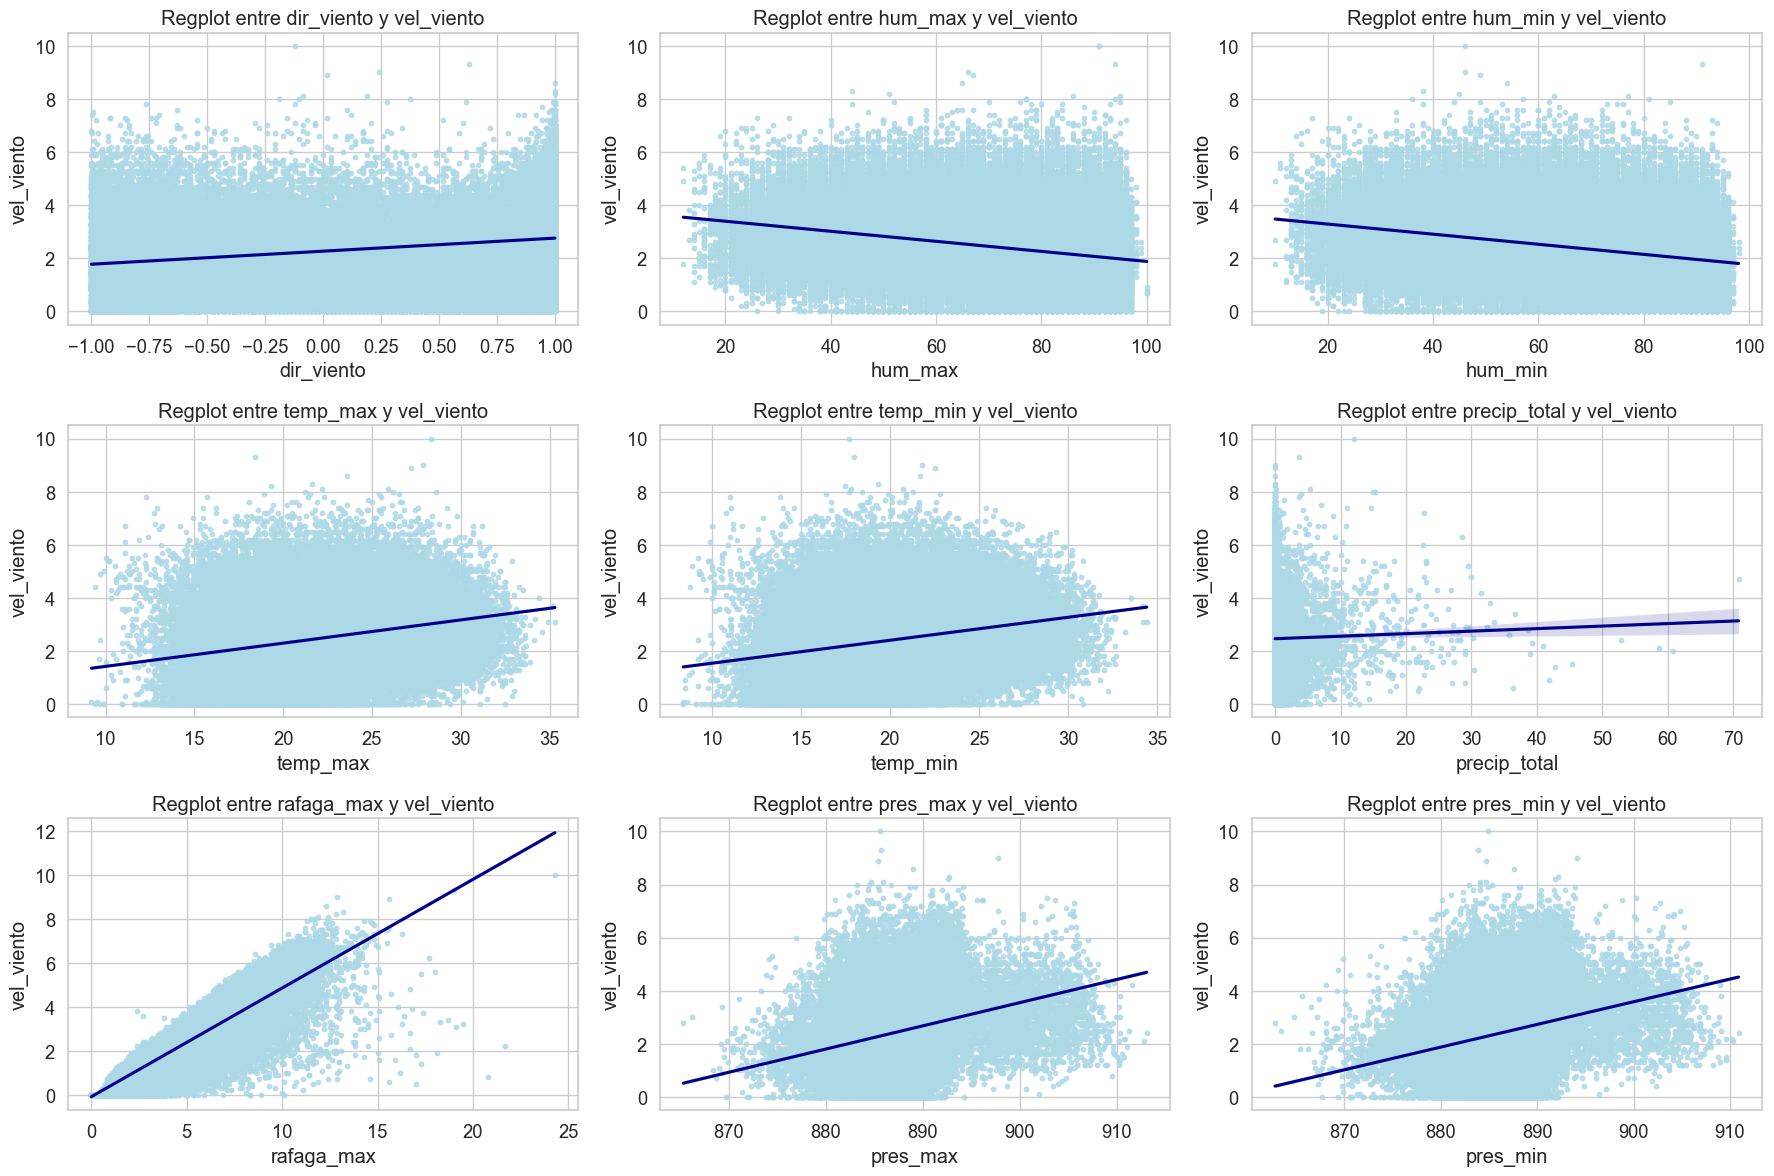

In [61]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

axs = axs.flatten()

for i, variables in enumerate(ejex):
    sns.regplot(x = data_modelo[variables], y = ejey, ax = axs[i], color = 'lightblue', scatter_kws = {'s': 10}, line_kws = {'color':'darkblue'})
    axs[i].set_title(f'Regplot entre {variables} y vel_viento')
    axs[i].set_xlabel(variables)
    axs[i].set_ylabel('vel_viento')

plt.tight_layout()
plt.show()

Los gráficos de regresión muestran las relaciones entre la velocidad del viento (`vel_viento`) y varias variables explicativas. En el gráfico de **dirección del viento** vs `vel_viento`, se observa una ligera tendencia positiva, lo que sugiere que un aumento en la dirección del viento podría estar asociado con un incremento en la velocidad del viento, aunque la relación es débil. Para **humedad máxima** y **mínima**, los gráficos revelan que no hay una correlación significativa, ya que la línea de regresión es casi horizontal, lo que indica que la humedad no parece afectar considerablemente la velocidad del viento. En cuanto a **temperatura máxima** y **mínima**, ambos gráficos muestran una ligera tendencia positiva, indicando que temperaturas más altas podrían estar relacionadas con mayores velocidades del viento, aunque la dispersión sigue siendo considerable. La **rafaga máxima** presenta una clara relación positiva con `vel_viento`, mostrando que a mayores ráfagas corresponden velocidades del viento más altas. Por otro lado, las variables de **presión máxima** y **mínima** muestran una tendencia positiva, sugiriendo que las presiones más altas podrían estar asociadas con un incremento en la velocidad del viento, aunque la relación no es tan marcada.
